In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
from deap import algorithms, base, creator, tools
import random
import numpy as np

In [ ]:
import pandas as pd


In [ ]:
from tensorflow import keras

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

In [ ]:
import multiprocessing



In [ ]:
import shap

## Importing Data

In [ ]:
# change the path in the function read_csv to the path where the dados.csv is storege in your computer or drive
df = pd.read_csv('https://raw.githubusercontent.com/mikaeq/data_ANN_VISCO/main/data.csv')


In [ ]:
print(df)

      component_I      component_II  Temperature [K]  mole_fraction  \
0             CCO                CO              298         0.0000   
1             CCO                CO              298         0.1000   
2             CCO                CO              298         0.2000   
3             CCO                CO              298         0.3000   
4             CCO                CO              298         0.4000   
..            ...               ...              ...            ...   
575  CCCCCCCCCCCC  CCCCCCCCCCCCCCCC              298         0.6082   
576  CCCCCCCCCCCC  CCCCCCCCCCCCCCCC              298         0.7053   
577  CCCCCCCCCCCC  CCCCCCCCCCCCCCCC              298         0.8045   
578  CCCCCCCCCCCC  CCCCCCCCCCCCCCCC              298         0.9050   
579  CCCCCCCCCCCC  CCCCCCCCCCCCCCCC              298         1.0000   

     viscosity [m^2/s]  
0         7.042000e-07  
1         7.566000e-07  
2         8.106000e-07  
3         8.790000e-07  
4         9.386000e-07

In [ ]:
for i in range(len(df['viscosity [m^2/s]'])):
  df.loc[i,['viscosity [m^2/s]']] = df['viscosity [m^2/s]'][i]*1e6

In [ ]:
df

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s]
0,CCO,CO,298,0.0000,0.704200
1,CCO,CO,298,0.1000,0.756600
2,CCO,CO,298,0.2000,0.810600
3,CCO,CO,298,0.3000,0.879000
4,CCO,CO,298,0.4000,0.938600
...,...,...,...,...,...
575,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.6082,2.559462
576,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.7053,2.344256
577,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.8045,2.178504
578,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.9050,1.972648


In [ ]:
df2 = df[['component_II','component_I', 'Temperature [K]', 'mole_fraction','viscosity [m^2/s]']]
df2 = df2.rename(columns={'component_I':'component_II','component_II':'component_I'})

In [ ]:
df2

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s]
0,CO,CCO,298,0.0000,0.704200
1,CO,CCO,298,0.1000,0.756600
2,CO,CCO,298,0.2000,0.810600
3,CO,CCO,298,0.3000,0.879000
4,CO,CCO,298,0.4000,0.938600
...,...,...,...,...,...
575,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.6082,2.559462
576,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.7053,2.344256
577,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.8045,2.178504
578,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.9050,1.972648


In [ ]:
sisdf2 = df2[['component_I','component_II']]
sisdf2=sisdf2.drop_duplicates()

In [ ]:
lc1 =list(sisdf2['component_I'])
lc2 = list(sisdf2['component_II'])

for k in range(len(sisdf2['component_I'])):
  c1 = lc1[k]
  c2 = lc2[k]
  lrev  = list(df2[(df2.component_I == c1) & (df2.component_II == c2)]['viscosity [m^2/s]'])
  lrev.reverse()
  lrev
  indexboolean = (df2.component_I == c1) & (df2.component_II == c2)
  indexlist = df2.index[(df2.component_I == c1) & (df2.component_II == c2)].tolist()
  for i in range(len(indexlist)):
    df2.loc[indexlist[i],['viscosity [m^2/s]']] = lrev[i]

In [ ]:
df2

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s]
0,CO,CCO,298,0.0000,1.402300
1,CO,CCO,298,0.1000,1.319300
2,CO,CCO,298,0.2000,1.229400
3,CO,CCO,298,0.3000,1.157600
4,CO,CCO,298,0.4000,1.080200
...,...,...,...,...,...
575,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.6082,2.996243
576,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.7053,3.230525
577,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.8045,3.451717
578,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.9050,3.674386


In [ ]:
df3 = df.append(df2, ignore_index=True)

In [ ]:
df3

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s]
0,CCO,CO,298,0.0000,0.704200
1,CCO,CO,298,0.1000,0.756600
2,CCO,CO,298,0.2000,0.810600
3,CCO,CO,298,0.3000,0.879000
4,CCO,CO,298,0.4000,0.938600
...,...,...,...,...,...
1155,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.6082,2.996243
1156,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.7053,3.230525
1157,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.8045,3.451717
1158,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.9050,3.674386


## Functions to transform SMILES in GC and normalization of data

In [ ]:
def smile_to_GCT(string_smile):
  # Recive a Smile string and return a vector with group contibuctions
  # CH3, CH2, CH, C=O, OH, CH2_cyclic, CH_aromatic
  if string_smile == 'CCO':
    return [1,1,0,0,1,0,0]
  if string_smile == 'CO':
    return [1,0,0,0,1,0,0]
  if string_smile == 'CC(C)O':
    return [2,0,1,0,1,0,0]
  if string_smile == 'CCCCCCC':
    return [2,5,0,0,0,0,0]
  if string_smile == 'C1=CC=CC=C1':
    return [0,0,0,0,0,0,6]
  if string_smile == 'CC(=O)C':
    return [2,0,0,1,0,0,0]
  if string_smile == 'CCCCCO':
    return [1,4,0,0,1,0,0]
  if string_smile == 'CCCCCCO':
    return [1,5,0,0,1,0,0]
  if string_smile == 'CCCCCCCO':
    return [1,6,0,0,1,0,0]
  if string_smile == 'CCCCCCCCO':
    return [1,7,0,0,1,0,0]
  if string_smile == 'CCCCCCCCCCO':
    return [1,9,0,0,1,0,0]
  if string_smile == 'CCCCCCCCCCCCO':
    return [1,11,0,0,1,0,0]
  if string_smile == 'CCCCC':
    return [2,3,0,0,0,0,0]
  if string_smile == 'CCCCCC':
    return [2,4,0,0,0,0,0]
  if string_smile == 'CCCCCCCC':
    return [2,6,0,0,0,0,0]
  if string_smile == 'CCCCCCCCC':
    return [2,7,0,0,0,0,0]
  if string_smile == 'CCCCCCCCCC':
    return [2,8,0,0,0,0,0]
  if string_smile == 'CCCCCCCCCCC':
    return [2,9,0,0,0,0,0]
  if string_smile == 'CCCCCCCCCCCC':
    return [2,10,0,0,0,0,0]
  if string_smile == 'CCCO':
    return [1,2,0,0,1,0,0]
  if string_smile == 'C1CCCCC1':
    return [0,0,0,0,0,6,0]
  if string_smile == 'CC1=CC=CC=C1':
    return [1,0,0,0,0,0,6]
  if string_smile == 'CCCCCCCCCCCCCCCC':
    return [2,14,0,0,0,0,0]


In [ ]:
def mapminmax(x,scale):
# recive a vector x and a list with minimal and maximal values and returne a normalised vector with values betowen the scale
  import numpy as np
  smin = min(scale)
  smax = max(scale)
  xmin = min(x)
  xmax = max(x)
  y = []
  x = np.array(x)
  y = ((smax-smin)*(x-xmin)/(xmax-xmin))+smin
  return y,xmin,xmax

In [ ]:
def revmapminmax(y,xmin,xmax):
  import numpy as np
  ymin = min(y)
  ymax = max(y)
  x = []
  y = np.array(y)
  x = (xmax-xmin)*(y-ymin)/(ymax-ymin)+xmin
  return x


In [ ]:
X = []
for i in range(len(df3['component_I'])):
  l1 = smile_to_GCT(df3['component_I'][i])
  l2 = smile_to_GCT(df3['component_II'][i])
  Lsum = l1+l2
  #Lsum.append(df3['Temperature [K]'][i])
  Lsum.append(df3['mole_fraction'][i])
  Lsum.append(1-df3['mole_fraction'][i])

  X.append(Lsum)
'''
for i in df3['component_II']:
  X2.append(smile_to_GCT(i))
  '''
'''
X1 = smile_to_GCT(df3['component_I'])
X2 = smile_to_GCT(df3['component_II'])
X3 =  df3['Temperature [K]']
X4 = df3['mole_fraction']

'''
yobj = []
for i in df3['viscosity [m^2/s]']:
  yobj.append([i])

X = np.array(X)
yobj = np.array(yobj)
scale_norm = [-1,1]
yobj,ymin,ymax = mapminmax(yobj,scale_norm)
Xmin = [0]*len(X[0,:])
Xmax = [0]*len(X[0,:])
for i in range(len(Xmin)):
  X[:,i],Xmin[i],Xmax[i] = mapminmax(X[:,i],scale_norm)
print(X)
print(yobj)

X_train, X_test, y_train, y_test = train_test_split(X,yobj, test_size = 0.3, random_state = 6)
X_test,X_vali,y_test,y_vali =train_test_split(X_test,y_test, test_size = 0.5, random_state = 6)

[[ 0.         -0.85714286 -1.         ... -1.         -1.
   1.        ]
 [ 0.         -0.85714286 -1.         ... -1.         -0.8
   0.8       ]
 [ 0.         -0.85714286 -1.         ... -1.         -0.6
   0.6       ]
 ...
 [ 1.          1.         -1.         ... -1.          0.609
  -0.609     ]
 [ 1.          1.         -1.         ... -1.          0.81
  -0.81      ]
 [ 1.          1.         -1.         ... -1.          1.
  -1.        ]]
[[-0.96389946]
 [-0.95842018]
 [-0.9527736 ]
 ...
 [-0.6766016 ]
 [-0.65331786]
 [-0.61740057]]


## GA Hyperparemter tuning of ANN

In [ ]:
def evoANNsr(l,x_t,y_t,x_v,y_v,X,yobj):
 # nl = l[0]
 # nn = l[1:4]
 # nopt = l[4]
 # lrinit = l[5]/1000
 # lrdr = l[6]/100
 # lrds = l[7]
 # lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lrinit,decay_steps=lrds,decay_rate=lrdr)
  nl = 1
  nn = l[0]
  nn = [nn]
  nopt = l[1]
  lrinit = l[2]/1000
  lrdr = l[3]/100
  lrds = l[4]
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lrinit,decay_steps=lrds,decay_rate=lrdr)
  def nopt_opt(nopt):
    if nopt == 1:
      return tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
    elif nopt == 2:
      return tf.keras.optimizers.SGD(learning_rate=lr_schedule)
    elif nopt == 3:
      return tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  opt = nopt_opt(nopt)

  callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta = 1e-8, patience=10)
  hide = []
  for hk in range(nl):
    if hk == 0:
      Iarg = [keras.layers.Dense(nn[0], activation='tanh', input_shape=(16,),bias_initializer='zeros')]
    else:
      hide += [keras.layers.Dense(nn[hk],activation='tanh',bias_initializer='zeros')]
  out = [keras.layers.Dense(1,activation='tanh',bias_initializer='zeros')]
  a = Iarg+hide+out

  model = keras.Sequential(a)

  model.compile(loss='mse',optimizer=opt,metrics=['mse',tf.keras.metrics.RootMeanSquaredError()])
  history = model.fit(x_t,y_t,epochs = 500,verbose=0,validation_data=(x_v,y_v),callbacks=[callback])
  hist = history.history
  N=len(yobj)
  ypred = model.predict(X)
  Ed = (ypred-yobj)
  Ed = np.sum(np.square(Ed))


  return (Ed,)






In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

In [ ]:

func_seq = [lambda:random.randint(1,50), lambda:random.randint(1,3), lambda:random.randint(1,100), lambda:random.randint(1,100), lambda:random.randint(100,100000)]
print(tools.initCycle(list, func_seq, n=1))
toolbox.register("individual", tools.initCycle, creator.Individual,seq_func=func_seq,n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

[26, 1, 63, 90, 88158]


In [ ]:
toolbox.register('evaluate',evoANNsr,x_t=X_train,y_t = y_train,x_v = X_test,y_v=y_test,X=X,yobj=yobj)

In [ ]:
random.seed(1)
pop = toolbox.population(n=26)
pop

[Individual([    9,     3,    98,     9, 33532]),
 Individual([    8,     2,    98,    58, 61998]),
 Individual([   42,     2,    27,    13, 64044]),
 Individual([  2,   2,  56,  78, 376]),
 Individual([   45,     2,    35,    93, 30084]),
 Individual([  38,    1,   41,    4, 3025]),
 Individual([    2,     3,    70,     2, 50065]),
 Individual([  44,    1,   55,   93, 3906]),
 Individual([   34,     1,    98,    57, 65087]),
 Individual([   36,     1,    45,    30, 88815]),
 Individual([   15,     2,    38,     3, 54649]),
 Individual([   36,     3,    13,    24, 82590]),
 Individual([   47,     2,    16,    96, 43707]),
 Individual([   47,     3,    65,    55, 66647]),
 Individual([   43,     1,    39,    37, 77115]),
 Individual([  32,    3,   51,   76, 4625]),
 Individual([   31,     1,    96,    52, 54404]),
 Individual([   43,     1,    47,    71, 92248]),
 Individual([   50,     3,    95,    48, 11433]),
 Individual([   29,     3,    66,    14, 21556]),
 Individual([   34,     2

In [ ]:
# The current cell of code was runed mutiples times, the min SSE is presented in the DOE results table in the paper
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt,low=[1,1,1,1,1000],up=[50,3,100,100,100000], indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
hof = tools.HallOfFame(3,similar=np.array_equal)
pool = multiprocessing.Pool()
toolbox.register("map", pool.map)


stats = tools.Statistics(key=lambda ind: ind.fitness.values)

stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)


pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.15, ngen=14,halloffame=hof,stats=stats, verbose=True)

37/37 [==============================] - 0s 1ms/step
gen	nevals	avg    	std    	min     	max   
0  	26    	32.6328	23.1142	0.537214	54.264
37/37 [==============================] - 0s 1ms/step
1  	20    	22.5514	20.9769	0.67747 	54.264
37/37 [==============================] - 0s 1ms/step
2  	23    	18.8729	22.3459	0.67987 	61.5627
37/37 [==============================] - 0s 1ms/step
3  	16    	12.7825	18.9142	0.547277	54.264 
37/37 [==============================] - 0s 1ms/step
4  	10    	8.62107	16.977 	0.547277	54.2636
37/37 [==============================] - 0s 1ms/step
5  	17    	6.41065	14.5839	0.515602	54.264 
37/37 [==============================] - 0s 1ms/step
6  	16    	2.70057	7.67764	0.515602	40.4864
37/37 [==============================] - 0s 1ms/step
7  	8     	2.12161	7.112  	0.482269	37.6739
37/37 [==============================] - 0s 2ms/step
8  	15    	5.8343 	14.3683	0.482269	54.2634
37/37 [==============================] - 0s 1ms/step
9  	18    	1.69783	2.41409	0.4822

In [ ]:
tools.selBest(pop,k=1)

In [ ]:
# Resulted hyperparmeters afther the DOE for each GA optimization of ANN
print([  35,    1,   41,    4, 3025])

[35, 1, 41, 4, 3025]


## Training and evaluating ANN with best individual


In [ ]:
l = tools.selBest(pop,k=1)[0]
print(l)
nl = 1
nn = [l[0]]
nopt = l[1]
lrinit = l[2]/1000
lrdr = l[3]/100
lrds = l[4]
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=lrinit,decay_steps=lrds,decay_rate=lrdr)
def nopt_opt(nopt):
  if nopt == 1:
    return tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
  elif nopt == 2:
    return tf.keras.optimizers.SGD(learning_rate=lr_schedule)
  elif nopt == 3:
    return tf.keras.optimizers.Adam(learning_rate=lr_schedule)

opt = nopt_opt(nopt)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-6, patience=10)
hide = []
for hk in range(nl):
  if hk == 0:
    Iarg = [keras.layers.Dense(nn[0], activation='tanh', input_shape=(16,),bias_initializer='zeros')]
  else:
    hide += [keras.layers.Dense(nn[hk],activation='tanh',bias_initializer='zeros')]
out = [keras.layers.Dense(1,activation='tanh',bias_initializer='zeros')]
a = Iarg+hide+out

model = keras.Sequential(a)

model.compile(loss='mse',optimizer=opt,metrics=['mse',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train,y_train,epochs = 1000,validation_data=(X_test,y_test),callbacks=[callback])

In [ ]:
# To save the model
# model.save('/content/drive/MyDrive/ANN_modelo_salvo')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ANN_modelo_salvo/assets


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/ANN_modelo_salvo')

37/37 [==============================] - 0s 1ms/step


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


0.9770321444304855


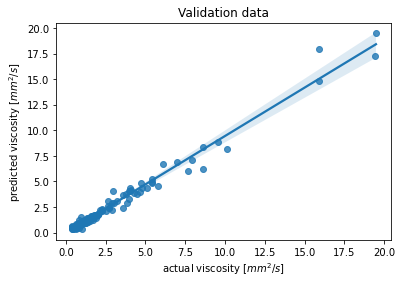

In [ ]:
ypred = model.predict(X_vali)
ymod =  model.predict(X)
y_vali_t = revmapminmax(y_vali,ymin,ymax)
ypred_t = revmapminmax(ypred,ymin,ymax)
aplot = sns.regplot(y_vali_t,ypred_t)
aplot.set(xlabel ='actual viscosity [$ mm^2/s $]',ylabel = 'predicted viscosity [$ mm^2/s $]', title = 'Validation data')
print(r2_score(y_vali_t,ypred_t))


6/6 [==============================] - 0s 2ms/step
0.9635827891584522


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


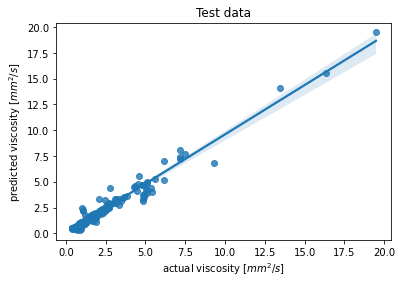

In [ ]:
ypredtest = model.predict(X_test)
y_test_t = revmapminmax(y_test,ymin,ymax)
ypredtest_t = revmapminmax(ypredtest,ymin,ymax)
bplot = sns.regplot(y_test_t,ypredtest_t)
bplot.set(xlabel ='actual viscosity [$ mm^2/s $]',ylabel = 'predicted viscosity [$ mm^2/s $]', title = 'Test data')

print(r2_score(y_test_t,ypredtest_t))


           component_I  component_II  Temperature [K]  mole_fraction  \
0                  CCO            CO              298         0.0000   
1                  CCO            CO              298         0.1000   
2                  CCO            CO              298         0.2000   
3                  CCO            CO              298         0.3000   
4                  CCO            CO              298         0.4000   
...                ...           ...              ...            ...   
1155  CCCCCCCCCCCCCCCC  CCCCCCCCCCCC              298         0.6082   
1156  CCCCCCCCCCCCCCCC  CCCCCCCCCCCC              298         0.7053   
1157  CCCCCCCCCCCCCCCC  CCCCCCCCCCCC              298         0.8045   
1158  CCCCCCCCCCCCCCCC  CCCCCCCCCCCC              298         0.9050   
1159  CCCCCCCCCCCCCCCC  CCCCCCCCCCCC              298         1.0000   

      viscosity [m^2/s]  prediction  
0              0.704200    1.162543  
1              0.756600    1.092577  
2              0.8106

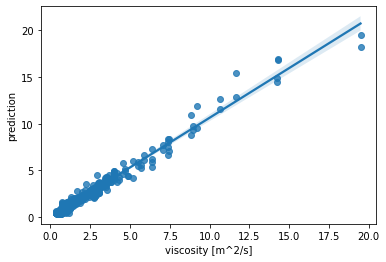

In [ ]:
df3['prediction'] = revmapminmax(ymod,ymin,ymax)
print(df3)
sns.regplot(x="viscosity [m^2/s]", y="prediction", data=df3)
print(tf.keras.losses.MSE(df3["viscosity [m^2/s]"],df3["prediction"]))
print(r2_score(df3["viscosity [m^2/s]"],df3["prediction"]))

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.legend(['traning','validation'],loc='best')
plt.ylabel('MSE')
plt.xlabel('Epoch')

NameError: ignored

In [ ]:
gahist = pd.DataFrame(log)

plt.plot(gahist['gen'],gahist['min'])
plt.xlabel('generation')
plt.ylabel('Best fitness value')

NameError: ignored

In [ ]:
df3

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s],prediction
0,CCO,CO,298,0.0000,0.704200,1.162543
1,CCO,CO,298,0.1000,0.756600,1.092577
2,CCO,CO,298,0.2000,0.810600,0.975195
3,CCO,CO,298,0.3000,0.879000,0.878738
4,CCO,CO,298,0.4000,0.938600,0.860471
...,...,...,...,...,...,...
1155,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.6082,2.996243,3.128052
1156,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.7053,3.230525,3.414460
1157,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.8045,3.451717,3.696977
1158,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.9050,3.674386,4.058868


In [ ]:
ddf1 = df

In [ ]:
ddf1['prediction'] = revmapminmax(ymod,ymin,ymax)[0:580]

In [ ]:
ddf2 =df2

In [ ]:
ddf2['prediction'] = revmapminmax(ymod,ymin,ymax)[580:1160]

In [ ]:
ddf2

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s],prediction
0,CO,CCO,298,0.0000,1.402300,1.246552
1,CO,CCO,298,0.1000,1.319300,1.127122
2,CO,CCO,298,0.2000,1.229400,0.993747
3,CO,CCO,298,0.3000,1.157600,0.902987
4,CO,CCO,298,0.4000,1.080200,0.890753
...,...,...,...,...,...,...
575,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.6082,2.996243,3.128052
576,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.7053,3.230525,3.414460
577,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.8045,3.451717,3.696977
578,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.9050,3.674386,4.058868


In [ ]:
ddf2 = ddf2[['component_II','component_I', 'Temperature [K]', 'mole_fraction','viscosity [m^2/s]','prediction']]
ddf2 = ddf2.rename(columns={'component_I':'component_II','component_II':'component_I'})
sisddf2 = ddf2[['component_I','component_II']]
sisddf2=sisddf2.drop_duplicates()
lc1d =list(sisddf2['component_I'])
lc2d = list(sisddf2['component_II'])

for k in range(len(sisddf2['component_I'])):
  c1 = lc1d[k]
  c2 = lc2d[k]
  lrev1  = list(ddf2[(ddf2.component_I == c1) & (ddf2.component_II == c2)]['prediction'])
  lrev1.reverse()
  lrev2  = list(ddf2[(ddf2.component_I == c1) & (ddf2.component_II == c2)]['viscosity [m^2/s]'])
  lrev2.reverse()
  indexboolean = (ddf2.component_I == c1) & (ddf2.component_II == c2)
  indexlist = ddf2.index[(ddf2.component_I == c1) & (ddf2.component_II == c2)].tolist()
  for i in range(len(indexlist)):
    ddf2.loc[indexlist[i],['prediction']] = lrev1[i]
    ddf2.loc[indexlist[i],['viscosity [m^2/s]']] = lrev2[i]


In [ ]:
df2

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s],prediction
0,CO,CCO,298,0.0000,1.402300,1.246552
1,CO,CCO,298,0.1000,1.319300,1.127122
2,CO,CCO,298,0.2000,1.229400,0.993747
3,CO,CCO,298,0.3000,1.157600,0.902987
4,CO,CCO,298,0.4000,1.080200,0.890753
...,...,...,...,...,...,...
575,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.6082,2.996243,3.128052
576,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.7053,3.230525,3.414460
577,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.8045,3.451717,3.696977
578,CCCCCCCCCCCCCCCC,CCCCCCCCCCCC,298,0.9050,3.674386,4.058868


In [ ]:
ddf1

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s],prediction
0,CCO,CO,298,0.0000,0.704200,1.162543
1,CCO,CO,298,0.1000,0.756600,1.092577
2,CCO,CO,298,0.2000,0.810600,0.975195
3,CCO,CO,298,0.3000,0.879000,0.878738
4,CCO,CO,298,0.4000,0.938600,0.860471
...,...,...,...,...,...,...
575,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.6082,2.559462,2.744857
576,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.7053,2.344256,2.621208
577,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.8045,2.178504,2.494940
578,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.9050,1.972648,2.341973


tf.Tensor(0.06972223938807236, shape=(), dtype=float64)
0.26404969113421123
0.9766128899320982


[Text(0, 0.5, 'predicted viscosity [$ mm^2/s $]'),
 Text(0.5, 0, 'actual viscosity [$ mm^2/s $]'),
 Text(0.5, 1.0, 'Mean value')]

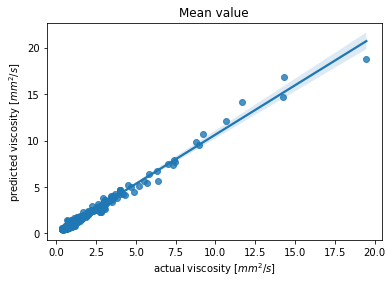

In [ ]:
meanvis = (np.array(ddf1.prediction)+ np.array(ddf2.prediction))/2
print(tf.keras.losses.MSE(np.array(ddf1['viscosity [m^2/s]']),meanvis))
print(np.sqrt(tf.keras.losses.MSE(np.array(ddf1['viscosity [m^2/s]']),meanvis)))

print(r2_score(np.array(ddf1['viscosity [m^2/s]']),meanvis))
cplot = sns.regplot(x=np.array(ddf1['viscosity [m^2/s]']),y=meanvis)
cplot.set(xlabel ='actual viscosity [$ mm^2/s $]',ylabel = 'predicted viscosity [$ mm^2/s $]', title = 'Mean value')

In [ ]:
dfinal = df

In [ ]:
dfinal['prediction'] = meanvis

In [ ]:
dfinal

,component_I,component_II,Temperature [K],mole_fraction,viscosity [m^2/s],prediction
0,CCO,CO,298,0.0000,0.704200,1.404915
1,CCO,CO,298,0.1000,0.756600,1.303684
2,CCO,CO,298,0.2000,0.810600,1.189704
3,CCO,CO,298,0.3000,0.879000,1.072317
4,CCO,CO,298,0.4000,0.938600,0.982333
...,...,...,...,...,...,...
575,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.6082,2.559462,2.677685
576,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.7053,2.344256,2.539633
577,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.8045,2.178504,2.416923
578,CCCCCCCCCCCC,CCCCCCCCCCCCCCCC,298,0.9050,1.972648,2.254417


## Evaluation of each binary system

In [ ]:
def smile_to_name(string_smile):
  # Recive a Smile string and return a vector with group contibuctions
  # CH3, CH2, CH, C=O, OH, CH2_cyclic, CH_aromatic
  if string_smile == 'CCO':
    return 'Ethanol'
  if string_smile == 'CO':
    return 'Methanol'
  if string_smile == 'CC(C)O':
    return '2-Propanol'
  if string_smile == 'CCCCCCC':
    return 'Heptane'
  if string_smile == 'C1=CC=CC=C1':
    return 'Benzene'
  if string_smile == 'CC(=O)C':
    return 'Acetone'
  if string_smile == 'CCCCCO':
    return 'Pentanol'
  if string_smile == 'CCCCCCO':
    return 'Hexanol'
  if string_smile == 'CCCCCCCO':
    return 'Heptanol'
  if string_smile == 'CCCCCCCCO':
    return 'Octanol'
  if string_smile == 'CCCCCCCCCCO':
    return 'Decanol'
  if string_smile == 'CCCCCCCCCCCCO':
    return 'Dodecanol'
  if string_smile == 'CCCCC':
    return 'Pentane'
  if string_smile == 'CCCCCC':
    return 'Hexane'
  if string_smile == 'CCCCCCCC':
    return 'Octane'
  if string_smile == 'CCCCCCCCC':
    return 'Nonane'
  if string_smile == 'CCCCCCCCCC':
    return 'Decane'
  if string_smile == 'CCCCCCCCCCC':
    return 'Undecane'
  if string_smile == 'CCCCCCCCCCCC':
    return 'Dodecane'
  if string_smile == 'CCCO':
    return 'Propanol'
  if string_smile == 'C1CCCCC1':
    return 'Cyclohexane'
  if string_smile == 'CC1=CC=CC=C1':
    return 'Toluene'
  if string_smile == 'CCCCCCCCCCCCCCCC':
    return 'Hexadecane'

In [ ]:
sisddf2 = dfinal[['component_I','component_II']]
sisddf2=sisddf2.drop_duplicates()
lc1d =list(sisddf2['component_I'])
lc2d = list(sisddf2['component_II'])

for k in range(len(sisddf2['component_I'])):
  c1 = lc1d[k]
  c2 = lc2d[k]
  lrev1  = list(dfinal[(dfinal.component_I == c1) & (dfinal.component_II == c2)]['prediction'])
  lrev2  = list(dfinal[(dfinal.component_I == c1) & (dfinal.component_II == c2)]['viscosity [m^2/s]'])
  print(smile_to_name(c1),smile_to_name(c2),float(tf.keras.losses.MSE(lrev1,lrev2)),float(tf.keras.losses.MSE(lrev1,lrev2))/(max(lrev1)-min(lrev1)),np.corrcoef(lrev1,lrev2)[1,0])



Ethanol Methanol 0.09244377166032791 0.15201292227161278 0.27519255334053494
2-Propanol Propanol 0.18420135974884033 0.1362767138995253 0.9358076196159919
2-Propanol Methanol 0.18697489798069 0.14949913529424877 0.9812747263517568
2-Propanol Ethanol 0.03486848622560501 0.025352780416911178 0.9900878635069696
Heptane Benzene 0.004789127968251705 0.03758968157962267 0.99864642967154
Ethanol Heptane 0.006341630592942238 0.007892356305872759 0.981024351708742
Benzene Ethanol 0.036334969103336334 0.04145669073367953 0.9202651133417951
Acetone Cyclohexane 0.022733991965651512 0.05489271545869872 0.9914853897431014
Acetone Benzene 0.0011719560716301203 0.005538750950372495 0.985288402516335
Acetone Toluene 0.007534055970609188 0.12951576121172334 0.6786234921849019
Pentanol Heptane 0.01876770332455635 0.005378899661447333 0.9963841292428418
Hexanol Heptane 0.09177035093307495 0.018356761617367472 0.9968956975228296
Heptanol Heptane 0.2538120448589325 0.037518512237848654 0.9952894749846455
Oc

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


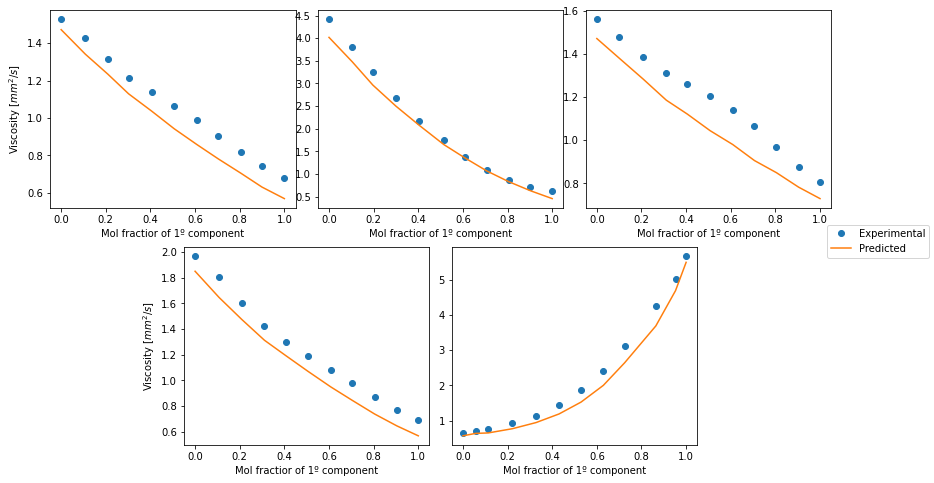

In [ ]:
fig = plt.figure(figsize=(14, 8),constrained_layout=True)

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axx = [ax1,ax2,ax3,ax4,ax5]
c1 = [7*"C",6*"C",8*"C",7*"C",6*"C"+"O"]
c2 = [11*"C",16*"C",11*"C",12*"C",7*"C"]
for i in range(len(c1)):
  lrev1  = list(dfinal[(dfinal.component_I == c1[i]) & (dfinal.component_II == c2[i])]['prediction'])
  lrev2  = list(dfinal[(dfinal.component_I == c1[i]) & (dfinal.component_II == c2[i])]['viscosity [m^2/s]'])
  comps = list(dfinal[(dfinal.component_I == c1[i]) & (dfinal.component_II == c2[i])]['mole_fraction'])
  axx[i].plot(comps,lrev1,'o',comps,lrev2)
  #axx[i].title(smile_to_name(c1[i])+' (1) & '+smile_to_name(c2[i])+' (2)')

ax1.set_ylabel('Viscosity [$mm^2/s$]')

fig.legend(('Experimental', 'Predicted'), loc='center right')

ax4.set_ylabel('Viscosity [$mm^2/s$]')
for i in range(len(c1)):
  axx[i].set_xlabel('Mol fractior of 1º component')

In [ ]:
np.shape(model.layers[1].get_weights()[0])

(35, 1)

In [ ]:
import time
sisddf2 = dfinal[['component_I','component_II']]
sisddf2=sisddf2.drop_duplicates()
lc1d =list(sisddf2['component_I'])
lc2d = list(sisddf2['component_II'])

for k in range(len(sisddf2['component_I'])):
  c1 = lc1d[k]
  c2 = lc2d[k]
  lrev1  = list(dfinal[(dfinal.component_I == c1) & (dfinal.component_II == c2)]['prediction'])
  lrev2  = list(dfinal[(dfinal.component_I == c1) & (dfinal.component_II == c2)]['viscosity [m^2/s]'])
  comps = list(dfinal[(dfinal.component_I == c1) & (dfinal.component_II == c2)]['mole_fraction'])
  plt.plot(comps,lrev1,'o',comps,lrev2)
  plt.show()
  time.sleep(3)
  plt.clf()

## Garson's Method to calculate relative importance of inputs to output.

In [ ]:
w1 = model.layers[0].get_weights()[0]
w2 = model.layers[1].get_weights()[0]
a = np.array([])
I = np.array([])
R = np.array([])


In [ ]:
a = []
for j in range(16):
  aa = 0
  for m in range(38):
    aa += np.abs(w2[m])*np.abs(w1[j,m])/np.sum(np.abs(w1[:,m]))
  a.append(aa)

print(a)
E = np.sum(a)
print(E)
I = a/E
I = I*100

[array([0.40550297], dtype=float32), array([0.8458355], dtype=float32), array([0.33705607], dtype=float32), array([0.28225744], dtype=float32), array([0.47595033], dtype=float32), array([0.33951354], dtype=float32), array([0.32178214], dtype=float32), array([0.24849781], dtype=float32), array([0.6499119], dtype=float32), array([0.24217527], dtype=float32), array([0.31500328], dtype=float32), array([0.3865238], dtype=float32), array([0.32600006], dtype=float32), array([0.2846633], dtype=float32), array([0.6094263], dtype=float32), array([0.6046336], dtype=float32)]
6.674733


In [ ]:
print(np.sum(I[0:7]))
print(np.sum(I[7:14]))
I[7:14]

45.063942
36.74717


array([[3.7229624],
       [9.736897 ],
       [3.6282392],
       [4.719339 ],
       [5.7908506],
       [4.8840914],
       [4.264789 ]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.patches.Wedge at 0x7fa1a6bae510>,
 [Text(1.0800260494079845, 0.20867135069333773, '$CH_3$'),
  Text(0.7821405994820161, 0.7734701562710178, '$CH_2$'),
  Text(0.2552937612047877, 1.0699649973199652, 'CH'),
  Text(-0.0629636752254328, 1.0981965104670959, 'C=O'),
  Text(-0.4426392480491061, 1.007010673273388, 'OH'),
  Text(-0.787519059660342, 0.7679933142102807, '$CH_2^{cyclic}$'),
  Text(-0.9848778000192834, 0.4899139914609265, '$CH^{aromatic}$'),
  Text(-1.0795383063664041, 0.2111801247455737, '$CH_3$'),
  Text(-1.071115047996574, -0.25042474709041246, '$CH_2$'),
  Text(-0.8759910659675535, -0.6653116956322274, 'CH'),
  Text(-0.673557940716152, -0.8696664305917625, 'C=O'),
  Text(-0.3552099612228491, -1.0410695862660009, 'OH'),
  Text(0.007207136066711032, -1.0999763893782977, '$CH_2^{cyclic}$'),
  Text(0.3187322886670997, -1.0528103951619365, '$CH^{aromatic}$'),
  Text(0.7210073515636157, -0.8307517071852581, '$x_1$'),
  Text(1.0557569175226709, -0.30883220541748635, '$x_

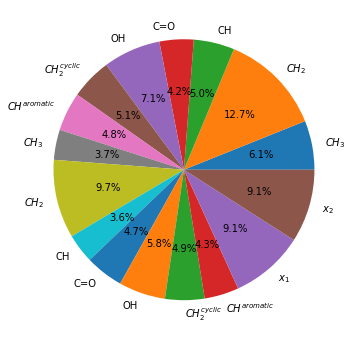

In [ ]:
fig = plt.figure(figsize=(8, 6))
pielabel = 2*['$CH_3$', '$CH_2$', 'CH', 'C=O', 'OH', '$CH_2^{cyclic}$', '$CH^{aromatic}$']+['$x_1$','$x_2$']
plt.pie(I,labels=pielabel, autopct='%1.1f%%')

In [ ]:
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   0%|          | 4/1160 [00:00<?, ?it/s]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   1%|          | 6/1160 [00:14<27:55,  1.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   1%|          | 7/1160 [00:17<40:11,  2.09s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   1%|          | 8/1160 [00:20<45:56,  2.39s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   1%|          | 9/1160 [00:23<48:48,  2.54s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   1%|          | 10/1160 [00:26<51:09,  2.67s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   1%|          | 11/1160 [00:29<52:41,  2.75s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:   1%|          | 12/1160 [00:31<53:44,  2.81s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   1%|          | 13/1160 [00:35<55:13,  2.89s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|          | 14/1160 [00:38<55:44,  2.92s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   1%|▏         | 15/1160 [00:40<55:45,  2.92s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   1%|▏         | 16/1160 [00:43<56:07,  2.94s/it]

44/44 [==============================] - 0s 2ms/step


Permutation explainer:   1%|▏         | 17/1160 [00:46<56:00,  2.94s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 18/1160 [00:49<56:17,  2.96s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▏         | 19/1160 [00:54<1:03:36,  3.34s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 20/1160 [00:58<1:07:20,  3.54s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 21/1160 [01:02<1:11:32,  3.77s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:   2%|▏         | 22/1160 [01:06<1:11:35,  3.77s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 23/1160 [01:10<1:13:37,  3.89s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 24/1160 [01:14<1:15:33,  3.99s/it]

44/44 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 25/1160 [01:18<1:12:30,  3.83s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 26/1160 [01:21<1:07:52,  3.59s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   2%|▏         | 27/1160 [01:24<1:04:41,  3.43s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 28/1160 [01:27<1:02:07,  3.29s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▎         | 29/1160 [01:29<59:41,  3.17s/it]  

44/44 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 30/1160 [01:32<58:28,  3.11s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   3%|▎         | 31/1160 [01:35<56:56,  3.03s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   3%|▎         | 32/1160 [01:38<56:16,  2.99s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 33/1160 [01:43<1:04:57,  3.46s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 34/1160 [01:46<1:05:13,  3.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 35/1160 [01:49<1:02:45,  3.35s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 36/1160 [01:52<1:00:13,  3.21s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 37/1160 [01:55<58:28,  3.12s/it]  

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   3%|▎         | 38/1160 [01:58<57:30,  3.08s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 39/1160 [02:01<57:00,  3.05s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 40/1160 [02:04<56:03,  3.00s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▎         | 41/1160 [02:07<55:13,  2.96s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▎         | 42/1160 [02:10<56:10,  3.01s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▎         | 43/1160 [02:13<56:28,  3.03s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   4%|▍         | 44/1160 [02:16<56:05,  3.02s/it]

43/43 [==============================] - 0s 1ms/step


Permutation explainer:   4%|▍         | 45/1160 [02:19<55:43,  3.00s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 46/1160 [02:22<55:30,  2.99s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 47/1160 [02:25<54:23,  2.93s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 48/1160 [02:28<53:36,  2.89s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 49/1160 [02:31<54:37,  2.95s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 50/1160 [02:34<54:08,  2.93s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   4%|▍         | 51/1160 [02:37<54:33,  2.95s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:   4%|▍         | 52/1160 [02:39<54:05,  2.93s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:   5%|▍         | 53/1160 [02:42<53:36,  2.91s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:   5%|▍         | 54/1160 [02:45<53:35,  2.91s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:   5%|▍         | 55/1160 [02:48<53:22,  2.90s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 56/1160 [02:51<53:37,  2.91s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:   5%|▍         | 57/1160 [02:54<53:52,  2.93s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 58/1160 [02:57<54:46,  2.98s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 59/1160 [03:00<54:49,  2.99s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 60/1160 [03:03<53:41,  2.93s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 61/1160 [03:06<53:52,  2.94s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 62/1160 [03:09<53:48,  2.94s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 63/1160 [03:12<56:40,  3.10s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 64/1160 [03:15<55:00,  3.01s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 65/1160 [03:18<55:38,  3.05s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   6%|▌         | 66/1160 [03:21<55:04,  3.02s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 67/1160 [03:24<53:34,  2.94s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 68/1160 [03:27<54:03,  2.97s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 69/1160 [03:30<54:23,  2.99s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   6%|▌         | 70/1160 [03:33<53:39,  2.95s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   6%|▌         | 71/1160 [03:35<51:24,  2.83s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|▌         | 72/1160 [03:38<52:28,  2.89s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   6%|▋         | 73/1160 [03:41<52:59,  2.93s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▋         | 74/1160 [03:46<59:35,  3.29s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   6%|▋         | 75/1160 [03:49<1:00:43,  3.36s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:   7%|▋         | 76/1160 [03:52<59:12,  3.28s/it]  

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 77/1160 [03:55<56:59,  3.16s/it]

38/38 [==============================] - 0s 1ms/step


Permutation explainer:   7%|▋         | 78/1160 [03:58<56:22,  3.13s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 79/1160 [04:01<55:28,  3.08s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 80/1160 [04:04<55:09,  3.06s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 81/1160 [04:07<55:16,  3.07s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   7%|▋         | 82/1160 [04:10<53:36,  2.98s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 83/1160 [04:13<55:52,  3.11s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 84/1160 [04:17<59:20,  3.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 85/1160 [04:20<56:08,  3.13s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 86/1160 [04:23<54:16,  3.03s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 87/1160 [04:25<52:52,  2.96s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 88/1160 [04:28<52:26,  2.94s/it]

39/39 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 89/1160 [04:31<52:30,  2.94s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 90/1160 [04:34<51:38,  2.90s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 91/1160 [04:37<51:58,  2.92s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 92/1160 [04:40<51:26,  2.89s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 93/1160 [04:43<51:17,  2.88s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 94/1160 [04:46<51:18,  2.89s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 95/1160 [04:48<51:05,  2.88s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   8%|▊         | 96/1160 [04:51<51:16,  2.89s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 97/1160 [04:54<50:26,  2.85s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 98/1160 [04:57<51:16,  2.90s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▊         | 99/1160 [05:00<51:56,  2.94s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▊         | 100/1160 [05:03<52:00,  2.94s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▊         | 101/1160 [05:06<51:38,  2.93s/it]

41/41 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▉         | 102/1160 [05:09<50:16,  2.85s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▉         | 103/1160 [05:12<50:26,  2.86s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 104/1160 [05:14<50:12,  2.85s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 105/1160 [05:17<50:08,  2.85s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▉         | 106/1160 [05:20<48:53,  2.78s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▉         | 107/1160 [05:23<48:53,  2.79s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 108/1160 [05:25<48:23,  2.76s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 109/1160 [05:28<48:34,  2.77s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:   9%|▉         | 110/1160 [05:31<47:09,  2.69s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  10%|▉         | 111/1160 [05:33<46:09,  2.64s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  10%|▉         | 112/1160 [05:36<46:02,  2.64s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  10%|▉         | 113/1160 [05:39<46:42,  2.68s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  10%|▉         | 114/1160 [05:41<46:33,  2.67s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  10%|▉         | 115/1160 [05:44<47:01,  2.70s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█         | 116/1160 [05:47<47:58,  2.76s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█         | 117/1160 [05:50<47:36,  2.74s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 118/1160 [05:52<46:45,  2.69s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 119/1160 [05:55<46:08,  2.66s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█         | 120/1160 [05:57<45:45,  2.64s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  10%|█         | 121/1160 [06:00<47:32,  2.75s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█         | 122/1160 [06:03<47:39,  2.75s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█         | 123/1160 [06:06<46:59,  2.72s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 124/1160 [06:09<46:54,  2.72s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█         | 125/1160 [06:11<46:55,  2.72s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█         | 126/1160 [06:14<46:02,  2.67s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 127/1160 [06:17<47:45,  2.77s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█         | 128/1160 [06:20<50:07,  2.91s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 129/1160 [06:23<48:49,  2.84s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█         | 130/1160 [06:25<48:24,  2.82s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█▏        | 131/1160 [06:28<47:38,  2.78s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█▏        | 132/1160 [06:31<48:08,  2.81s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  11%|█▏        | 133/1160 [06:34<47:25,  2.77s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 134/1160 [06:36<46:41,  2.73s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 135/1160 [06:39<45:45,  2.68s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 136/1160 [06:42<45:32,  2.67s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 137/1160 [06:45<49:38,  2.91s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 138/1160 [06:48<51:47,  3.04s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 139/1160 [06:51<50:22,  2.96s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 140/1160 [06:54<48:36,  2.86s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 141/1160 [06:57<49:04,  2.89s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 142/1160 [06:59<47:43,  2.81s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 143/1160 [07:02<48:26,  2.86s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▏        | 144/1160 [07:05<49:42,  2.94s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  12%|█▎        | 145/1160 [07:08<49:42,  2.94s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 146/1160 [07:11<49:25,  2.92s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 147/1160 [07:14<48:22,  2.87s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 148/1160 [07:17<47:35,  2.82s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 149/1160 [07:19<47:06,  2.80s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 150/1160 [07:22<47:09,  2.80s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 151/1160 [07:25<47:50,  2.84s/it]

37/37 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 152/1160 [07:28<47:34,  2.83s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 153/1160 [07:31<46:55,  2.80s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 154/1160 [07:33<46:30,  2.77s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  13%|█▎        | 155/1160 [07:36<46:43,  2.79s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  13%|█▎        | 156/1160 [07:39<46:48,  2.80s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▎        | 157/1160 [07:42<46:11,  2.76s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▎        | 158/1160 [07:45<46:06,  2.76s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▎        | 159/1160 [07:47<45:01,  2.70s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▍        | 160/1160 [07:50<45:18,  2.72s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 161/1160 [07:53<45:04,  2.71s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▍        | 162/1160 [07:55<45:25,  2.73s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▍        | 163/1160 [07:58<45:19,  2.73s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 164/1160 [08:01<46:21,  2.79s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 165/1160 [08:04<46:20,  2.79s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 166/1160 [08:07<46:44,  2.82s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 167/1160 [08:09<46:22,  2.80s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  14%|█▍        | 168/1160 [08:12<46:48,  2.83s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  15%|█▍        | 169/1160 [08:15<46:01,  2.79s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▍        | 170/1160 [08:18<47:12,  2.86s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:  15%|█▍        | 171/1160 [08:21<47:07,  2.86s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▍        | 172/1160 [08:24<47:00,  2.85s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▍        | 173/1160 [08:27<47:01,  2.86s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 174/1160 [08:30<47:07,  2.87s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 175/1160 [08:33<47:46,  2.91s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 176/1160 [08:35<47:44,  2.91s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 177/1160 [08:38<47:41,  2.91s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 178/1160 [08:41<47:37,  2.91s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  15%|█▌        | 179/1160 [08:44<47:50,  2.93s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 180/1160 [08:47<47:50,  2.93s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 181/1160 [08:51<51:24,  3.15s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  16%|█▌        | 182/1160 [08:54<50:50,  3.12s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 183/1160 [08:57<49:53,  3.06s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 184/1160 [09:00<48:44,  3.00s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 185/1160 [09:02<47:53,  2.95s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  16%|█▌        | 186/1160 [09:05<46:10,  2.84s/it]

25/25 [==============================] - 0s 1ms/step


Permutation explainer:  16%|█▌        | 187/1160 [09:08<45:26,  2.80s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 188/1160 [09:11<45:04,  2.78s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▋        | 189/1160 [09:13<44:52,  2.77s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▋        | 190/1160 [09:17<47:48,  2.96s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▋        | 191/1160 [09:19<47:05,  2.92s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 192/1160 [09:22<45:54,  2.85s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 193/1160 [09:25<44:20,  2.75s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  17%|█▋        | 194/1160 [09:27<42:12,  2.62s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 195/1160 [09:29<41:20,  2.57s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  17%|█▋        | 196/1160 [09:32<41:32,  2.59s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 197/1160 [09:35<41:03,  2.56s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 198/1160 [09:37<41:42,  2.60s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  17%|█▋        | 199/1160 [09:40<42:11,  2.63s/it]

27/27 [==============================] - 0s 1ms/step


Permutation explainer:  17%|█▋        | 200/1160 [09:43<43:58,  2.75s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 201/1160 [09:46<42:55,  2.69s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  17%|█▋        | 202/1160 [09:48<43:34,  2.73s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 203/1160 [09:51<43:27,  2.72s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 204/1160 [09:54<43:38,  2.74s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 205/1160 [09:57<43:14,  2.72s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 206/1160 [09:59<42:35,  2.68s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 207/1160 [10:02<41:49,  2.63s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 208/1160 [10:04<41:53,  2.64s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 209/1160 [10:07<41:49,  2.64s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 210/1160 [10:10<42:32,  2.69s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 211/1160 [10:13<43:03,  2.72s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█▊        | 212/1160 [10:15<43:47,  2.77s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  18%|█▊        | 213/1160 [10:18<44:52,  2.84s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 214/1160 [10:21<44:32,  2.83s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▊        | 215/1160 [10:24<43:24,  2.76s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▊        | 216/1160 [10:27<43:03,  2.74s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▊        | 217/1160 [10:29<42:41,  2.72s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 218/1160 [10:32<41:36,  2.65s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 219/1160 [10:35<42:33,  2.71s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▉        | 220/1160 [10:37<42:00,  2.68s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 221/1160 [10:40<41:44,  2.67s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▉        | 222/1160 [10:43<42:32,  2.72s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 223/1160 [10:46<43:09,  2.76s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 224/1160 [10:48<42:20,  2.71s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▉        | 225/1160 [10:51<41:25,  2.66s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  19%|█▉        | 226/1160 [10:54<43:24,  2.79s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  20%|█▉        | 227/1160 [10:56<41:49,  2.69s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 228/1160 [10:59<42:05,  2.71s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 229/1160 [11:01<40:40,  2.62s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 230/1160 [11:04<39:59,  2.58s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 231/1160 [11:06<38:56,  2.51s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  20%|██        | 232/1160 [11:09<39:05,  2.53s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 233/1160 [11:11<39:57,  2.59s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  20%|██        | 234/1160 [11:14<40:58,  2.65s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  20%|██        | 235/1160 [11:17<41:47,  2.71s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 236/1160 [11:20<43:20,  2.81s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 237/1160 [11:23<44:43,  2.91s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  21%|██        | 238/1160 [11:26<44:37,  2.90s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██        | 239/1160 [11:29<42:39,  2.78s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  21%|██        | 240/1160 [11:31<42:22,  2.76s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██        | 241/1160 [11:34<41:24,  2.70s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  21%|██        | 242/1160 [11:37<40:32,  2.65s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██        | 243/1160 [11:39<40:59,  2.68s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  21%|██        | 244/1160 [11:42<40:52,  2.68s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██        | 245/1160 [11:45<41:25,  2.72s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██        | 246/1160 [11:48<43:20,  2.85s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██▏       | 247/1160 [11:51<44:24,  2.92s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██▏       | 248/1160 [11:53<42:30,  2.80s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██▏       | 249/1160 [11:56<41:22,  2.73s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 250/1160 [11:59<41:08,  2.71s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 251/1160 [12:01<40:10,  2.65s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 252/1160 [12:04<40:44,  2.69s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██▏       | 253/1160 [12:07<40:46,  2.70s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██▏       | 254/1160 [12:09<40:15,  2.67s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██▏       | 255/1160 [12:12<38:39,  2.56s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 256/1160 [12:14<38:47,  2.57s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██▏       | 257/1160 [12:17<38:07,  2.53s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 258/1160 [12:19<38:00,  2.53s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 259/1160 [12:22<39:00,  2.60s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 260/1160 [12:24<38:11,  2.55s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  22%|██▎       | 261/1160 [12:27<39:01,  2.60s/it]

25/25 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 262/1160 [12:30<38:09,  2.55s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 263/1160 [12:32<37:37,  2.52s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 264/1160 [12:35<37:56,  2.54s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 265/1160 [12:37<37:50,  2.54s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 266/1160 [12:40<37:17,  2.50s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 267/1160 [12:42<37:19,  2.51s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 268/1160 [12:45<37:07,  2.50s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 269/1160 [12:47<37:58,  2.56s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 270/1160 [12:50<37:24,  2.52s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  23%|██▎       | 271/1160 [12:52<35:59,  2.43s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 272/1160 [12:54<36:40,  2.48s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  24%|██▎       | 273/1160 [12:57<37:08,  2.51s/it]

27/27 [==============================] - 0s 1ms/step


Permutation explainer:  24%|██▎       | 274/1160 [12:59<36:33,  2.48s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▎       | 275/1160 [13:02<36:51,  2.50s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  24%|██▍       | 276/1160 [13:04<36:34,  2.48s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  24%|██▍       | 277/1160 [13:07<36:51,  2.51s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  24%|██▍       | 278/1160 [13:09<36:40,  2.49s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 279/1160 [13:12<36:43,  2.50s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 280/1160 [13:14<36:28,  2.49s/it]

25/25 [==============================] - 0s 1ms/step


Permutation explainer:  24%|██▍       | 281/1160 [13:17<37:11,  2.54s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 282/1160 [13:20<36:44,  2.51s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 283/1160 [13:22<36:51,  2.52s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 284/1160 [13:25<36:39,  2.51s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  25%|██▍       | 285/1160 [13:27<35:52,  2.46s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 286/1160 [13:30<36:24,  2.50s/it]

25/25 [==============================] - 0s 1ms/step


Permutation explainer:  25%|██▍       | 287/1160 [13:32<37:21,  2.57s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 288/1160 [13:35<37:18,  2.57s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 289/1160 [13:38<38:21,  2.64s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  25%|██▌       | 290/1160 [13:40<37:52,  2.61s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 291/1160 [13:43<39:14,  2.71s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  25%|██▌       | 292/1160 [13:46<39:00,  2.70s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 293/1160 [13:48<38:50,  2.69s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 294/1160 [13:51<40:17,  2.79s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 295/1160 [13:54<38:27,  2.67s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 296/1160 [13:57<40:40,  2.82s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▌       | 297/1160 [14:00<42:34,  2.96s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 298/1160 [14:03<41:38,  2.90s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▌       | 299/1160 [14:05<38:59,  2.72s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▌       | 300/1160 [14:08<38:14,  2.67s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▌       | 301/1160 [14:11<38:47,  2.71s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 302/1160 [14:13<38:35,  2.70s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▌       | 303/1160 [14:16<39:13,  2.75s/it]

24/24 [==============================] - 0s 1ms/step


Permutation explainer:  26%|██▌       | 304/1160 [14:19<38:40,  2.71s/it]

31/31 [==============================] - 0s 3ms/step


Permutation explainer:  26%|██▋       | 305/1160 [14:22<40:24,  2.84s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▋       | 306/1160 [14:25<42:56,  3.02s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▋       | 307/1160 [14:28<41:56,  2.95s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 308/1160 [14:32<43:40,  3.08s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 309/1160 [14:34<41:46,  2.95s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 310/1160 [14:37<41:33,  2.93s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 311/1160 [14:40<41:53,  2.96s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 312/1160 [14:43<42:43,  3.02s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 313/1160 [14:46<42:17,  3.00s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 314/1160 [14:49<41:49,  2.97s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  27%|██▋       | 315/1160 [14:52<41:07,  2.92s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 316/1160 [14:55<39:36,  2.82s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 317/1160 [14:58<40:06,  2.85s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 318/1160 [15:00<39:31,  2.82s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 319/1160 [15:03<39:20,  2.81s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 320/1160 [15:06<39:51,  2.85s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 321/1160 [15:09<38:55,  2.78s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 322/1160 [15:11<39:10,  2.81s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 323/1160 [15:14<38:22,  2.75s/it]

27/27 [==============================] - 0s 1ms/step


Permutation explainer:  28%|██▊       | 324/1160 [15:17<37:38,  2.70s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 325/1160 [15:20<38:20,  2.76s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 326/1160 [15:22<38:52,  2.80s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 327/1160 [15:25<38:37,  2.78s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 328/1160 [15:28<37:23,  2.70s/it]

25/25 [==============================] - 0s 1ms/step


Permutation explainer:  28%|██▊       | 329/1160 [15:31<37:52,  2.73s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  28%|██▊       | 330/1160 [15:33<38:21,  2.77s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▊       | 331/1160 [15:36<38:44,  2.80s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▊       | 332/1160 [15:39<38:43,  2.81s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▊       | 333/1160 [15:42<38:06,  2.77s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 334/1160 [15:45<38:29,  2.80s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 335/1160 [15:47<38:26,  2.80s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 336/1160 [15:50<37:57,  2.76s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 337/1160 [15:53<37:48,  2.76s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 338/1160 [15:56<38:17,  2.79s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 339/1160 [15:59<38:46,  2.83s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  29%|██▉       | 340/1160 [16:01<36:55,  2.70s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  29%|██▉       | 341/1160 [16:04<36:44,  2.69s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 342/1160 [16:06<36:33,  2.68s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██▉       | 343/1160 [16:09<36:35,  2.69s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██▉       | 344/1160 [16:12<36:42,  2.70s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  30%|██▉       | 345/1160 [16:14<36:15,  2.67s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  30%|██▉       | 346/1160 [16:17<35:46,  2.64s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  30%|██▉       | 347/1160 [16:20<36:06,  2.66s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  30%|███       | 348/1160 [16:22<35:21,  2.61s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 349/1160 [16:25<35:23,  2.62s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 350/1160 [16:27<35:33,  2.63s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  30%|███       | 351/1160 [16:30<36:19,  2.69s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 352/1160 [16:33<38:05,  2.83s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 353/1160 [16:36<38:51,  2.89s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 354/1160 [16:39<37:51,  2.82s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 355/1160 [16:42<36:12,  2.70s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 356/1160 [16:44<36:04,  2.69s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 357/1160 [16:47<35:17,  2.64s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 358/1160 [16:49<35:09,  2.63s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 359/1160 [16:52<33:43,  2.53s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 360/1160 [16:54<34:56,  2.62s/it]

26/26 [==============================] - 0s 4ms/step


Permutation explainer:  31%|███       | 361/1160 [16:58<38:03,  2.86s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 362/1160 [17:00<35:58,  2.71s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  31%|███▏      | 363/1160 [17:03<36:15,  2.73s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███▏      | 364/1160 [17:06<36:29,  2.75s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  31%|███▏      | 365/1160 [17:08<35:55,  2.71s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 366/1160 [17:11<36:39,  2.77s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 367/1160 [17:14<35:03,  2.65s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 368/1160 [17:16<35:22,  2.68s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 369/1160 [17:19<34:34,  2.62s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 370/1160 [17:22<35:04,  2.66s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 371/1160 [17:24<35:16,  2.68s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 372/1160 [17:27<35:11,  2.68s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 373/1160 [17:30<35:34,  2.71s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 374/1160 [17:33<35:40,  2.72s/it]

27/27 [==============================] - 0s 1ms/step


Permutation explainer:  32%|███▏      | 375/1160 [17:35<34:24,  2.63s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 376/1160 [17:38<34:46,  2.66s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▎      | 377/1160 [17:41<35:48,  2.74s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 378/1160 [17:44<36:08,  2.77s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 379/1160 [17:46<35:13,  2.71s/it]

27/27 [==============================] - 0s 1ms/step


Permutation explainer:  33%|███▎      | 380/1160 [17:49<34:32,  2.66s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  33%|███▎      | 381/1160 [17:51<34:48,  2.68s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 382/1160 [17:54<34:54,  2.69s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 383/1160 [17:57<35:08,  2.71s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  33%|███▎      | 384/1160 [18:00<34:40,  2.68s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 385/1160 [18:02<35:16,  2.73s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 386/1160 [18:05<33:33,  2.60s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 387/1160 [18:08<35:26,  2.75s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 388/1160 [18:11<37:21,  2.90s/it]

25/25 [==============================] - 0s 1ms/step


Permutation explainer:  34%|███▎      | 389/1160 [18:13<35:27,  2.76s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▎      | 390/1160 [18:16<35:35,  2.77s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▎      | 391/1160 [18:19<34:35,  2.70s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 392/1160 [18:22<35:10,  2.75s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 393/1160 [18:24<35:34,  2.78s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 394/1160 [18:27<35:06,  2.75s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 395/1160 [18:30<35:30,  2.79s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  34%|███▍      | 396/1160 [18:33<35:14,  2.77s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 397/1160 [18:36<36:03,  2.84s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 398/1160 [18:38<35:31,  2.80s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 399/1160 [18:41<34:34,  2.73s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  34%|███▍      | 400/1160 [18:44<35:08,  2.77s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 401/1160 [18:47<34:28,  2.73s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 402/1160 [18:49<34:26,  2.73s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 403/1160 [18:52<35:10,  2.79s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  35%|███▍      | 404/1160 [18:55<34:33,  2.74s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 405/1160 [18:57<34:13,  2.72s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 406/1160 [19:00<34:03,  2.71s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 407/1160 [19:03<34:35,  2.76s/it]

27/27 [==============================] - 0s 3ms/step


Permutation explainer:  35%|███▌      | 408/1160 [19:06<36:45,  2.93s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 409/1160 [19:10<37:41,  3.01s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 410/1160 [19:12<36:23,  2.91s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 411/1160 [19:15<35:21,  2.83s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 412/1160 [19:18<34:59,  2.81s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  36%|███▌      | 413/1160 [19:20<34:44,  2.79s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 414/1160 [19:23<34:20,  2.76s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 415/1160 [19:26<33:55,  2.73s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  36%|███▌      | 416/1160 [19:29<36:09,  2.92s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  36%|███▌      | 417/1160 [19:32<37:00,  2.99s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 418/1160 [19:35<35:12,  2.85s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 419/1160 [19:38<34:48,  2.82s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 420/1160 [19:40<34:14,  2.78s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▋      | 421/1160 [19:43<34:20,  2.79s/it]

25/25 [==============================] - 0s 1ms/step


Permutation explainer:  36%|███▋      | 422/1160 [19:46<33:17,  2.71s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▋      | 423/1160 [19:48<33:14,  2.71s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 424/1160 [19:51<33:44,  2.75s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 425/1160 [19:54<33:19,  2.72s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 426/1160 [19:57<33:35,  2.75s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 427/1160 [19:59<33:45,  2.76s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 428/1160 [20:02<33:48,  2.77s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 429/1160 [20:05<33:21,  2.74s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 430/1160 [20:07<32:54,  2.71s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 431/1160 [20:10<33:37,  2.77s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 432/1160 [20:13<33:26,  2.76s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  37%|███▋      | 433/1160 [20:16<33:13,  2.74s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 434/1160 [20:18<32:22,  2.68s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 435/1160 [20:21<32:48,  2.72s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 436/1160 [20:24<33:03,  2.74s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 437/1160 [20:27<32:54,  2.73s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 438/1160 [20:29<32:54,  2.73s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 439/1160 [20:32<32:37,  2.72s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 440/1160 [20:35<32:46,  2.73s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 441/1160 [20:38<32:41,  2.73s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 442/1160 [20:40<32:50,  2.74s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 443/1160 [20:43<32:26,  2.71s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 444/1160 [20:46<33:10,  2.78s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 445/1160 [20:48<32:11,  2.70s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  38%|███▊      | 446/1160 [20:51<32:14,  2.71s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▊      | 447/1160 [20:54<32:15,  2.71s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▊      | 448/1160 [20:57<32:30,  2.74s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▊      | 449/1160 [20:59<32:01,  2.70s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 450/1160 [21:02<32:04,  2.71s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  39%|███▉      | 451/1160 [21:05<32:10,  2.72s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 452/1160 [21:07<31:31,  2.67s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 453/1160 [21:10<32:12,  2.73s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 454/1160 [21:13<31:57,  2.72s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 455/1160 [21:15<31:37,  2.69s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 456/1160 [21:18<31:20,  2.67s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 457/1160 [21:21<31:28,  2.69s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 458/1160 [21:23<30:31,  2.61s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  40%|███▉      | 459/1160 [21:26<31:07,  2.66s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███▉      | 460/1160 [21:28<29:38,  2.54s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███▉      | 461/1160 [21:31<30:15,  2.60s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  40%|███▉      | 462/1160 [21:34<30:46,  2.65s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███▉      | 463/1160 [21:37<31:09,  2.68s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 464/1160 [21:39<31:54,  2.75s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 465/1160 [21:43<34:29,  2.98s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 466/1160 [21:46<34:35,  2.99s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 467/1160 [21:49<33:13,  2.88s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 468/1160 [21:51<33:08,  2.87s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 469/1160 [21:54<31:27,  2.73s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 470/1160 [21:57<32:59,  2.87s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 471/1160 [22:00<32:16,  2.81s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  41%|████      | 472/1160 [22:03<33:55,  2.96s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 473/1160 [22:06<34:29,  3.01s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  41%|████      | 474/1160 [22:09<33:26,  2.93s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 475/1160 [22:12<32:51,  2.88s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  41%|████      | 476/1160 [22:15<33:22,  2.93s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 477/1160 [22:18<32:53,  2.89s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 478/1160 [22:20<32:54,  2.89s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████▏     | 479/1160 [22:23<31:32,  2.78s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████▏     | 480/1160 [22:26<31:41,  2.80s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████▏     | 481/1160 [22:29<32:03,  2.83s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 482/1160 [22:31<31:43,  2.81s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 483/1160 [22:34<32:20,  2.87s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 484/1160 [22:37<31:29,  2.80s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 485/1160 [22:40<31:47,  2.83s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 486/1160 [22:43<32:09,  2.86s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 487/1160 [22:46<31:36,  2.82s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  42%|████▏     | 488/1160 [22:48<30:31,  2.72s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 489/1160 [22:51<31:06,  2.78s/it]

30/30 [==============================] - 0s 3ms/step


Permutation explainer:  42%|████▏     | 490/1160 [22:54<31:38,  2.83s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 491/1160 [22:57<30:40,  2.75s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 492/1160 [22:59<30:33,  2.75s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▎     | 493/1160 [23:02<30:27,  2.74s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 494/1160 [23:05<30:01,  2.70s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  43%|████▎     | 495/1160 [23:07<29:59,  2.71s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  43%|████▎     | 496/1160 [23:10<29:10,  2.64s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 497/1160 [23:12<29:03,  2.63s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 498/1160 [23:15<29:46,  2.70s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 499/1160 [23:18<30:21,  2.76s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 500/1160 [23:21<29:23,  2.67s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 501/1160 [23:23<29:35,  2.69s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 502/1160 [23:26<29:05,  2.65s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 503/1160 [23:29<30:04,  2.75s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 504/1160 [23:32<30:01,  2.75s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  44%|████▎     | 505/1160 [23:35<30:16,  2.77s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  44%|████▎     | 506/1160 [23:37<30:00,  2.75s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▎     | 507/1160 [23:40<29:51,  2.74s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 508/1160 [23:43<30:27,  2.80s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 509/1160 [23:46<29:58,  2.76s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 510/1160 [23:48<30:16,  2.79s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 511/1160 [23:51<30:24,  2.81s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 512/1160 [23:54<29:52,  2.77s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 513/1160 [23:57<29:55,  2.78s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 514/1160 [24:00<30:22,  2.82s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  44%|████▍     | 515/1160 [24:02<29:39,  2.76s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 516/1160 [24:05<29:49,  2.78s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▍     | 517/1160 [24:08<29:32,  2.76s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 518/1160 [24:11<29:48,  2.79s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 519/1160 [24:13<29:43,  2.78s/it]

28/28 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▍     | 520/1160 [24:17<30:52,  2.89s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 521/1160 [24:20<32:29,  3.05s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 522/1160 [24:23<32:08,  3.02s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 523/1160 [24:26<31:22,  2.96s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 524/1160 [24:29<31:15,  2.95s/it]

28/28 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▌     | 525/1160 [24:31<30:45,  2.91s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 526/1160 [24:35<31:04,  2.94s/it]

25/25 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▌     | 527/1160 [24:38<32:15,  3.06s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 528/1160 [24:41<33:25,  3.17s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 529/1160 [24:44<32:08,  3.06s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 530/1160 [24:47<31:17,  2.98s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  46%|████▌     | 531/1160 [24:50<30:23,  2.90s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 532/1160 [24:53<30:40,  2.93s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  46%|████▌     | 533/1160 [24:55<30:32,  2.92s/it]

26/26 [==============================] - 0s 1ms/step


Permutation explainer:  46%|████▌     | 534/1160 [24:58<30:04,  2.88s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 535/1160 [25:01<29:18,  2.81s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 536/1160 [25:04<29:24,  2.83s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▋     | 537/1160 [25:07<29:30,  2.84s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▋     | 538/1160 [25:10<29:30,  2.85s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▋     | 539/1160 [25:12<29:05,  2.81s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  47%|████▋     | 540/1160 [25:15<29:06,  2.82s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 541/1160 [25:18<28:38,  2.78s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 542/1160 [25:21<28:33,  2.77s/it]

30/30 [==============================] - 0s 1ms/step


Permutation explainer:  47%|████▋     | 543/1160 [25:23<28:41,  2.79s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 544/1160 [25:26<28:26,  2.77s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 545/1160 [25:29<28:15,  2.76s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 546/1160 [25:32<28:04,  2.74s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 547/1160 [25:34<27:55,  2.73s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 548/1160 [25:37<27:44,  2.72s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 549/1160 [25:40<27:25,  2.69s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 550/1160 [25:42<27:45,  2.73s/it]

28/28 [==============================] - 0s 1ms/step


Permutation explainer:  48%|████▊     | 551/1160 [25:45<28:03,  2.77s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  48%|████▊     | 552/1160 [25:48<29:23,  2.90s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 553/1160 [25:51<29:21,  2.90s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 554/1160 [25:54<29:44,  2.95s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 555/1160 [25:57<29:01,  2.88s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 556/1160 [26:00<28:11,  2.80s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 557/1160 [26:03<28:06,  2.80s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 558/1160 [26:05<27:51,  2.78s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 559/1160 [26:08<28:36,  2.86s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 560/1160 [26:11<27:48,  2.78s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 561/1160 [26:14<27:59,  2.80s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 562/1160 [26:17<27:49,  2.79s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▊     | 563/1160 [26:19<27:53,  2.80s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▊     | 564/1160 [26:22<27:11,  2.74s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  49%|████▊     | 565/1160 [26:25<26:47,  2.70s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 566/1160 [26:27<26:36,  2.69s/it]

27/27 [==============================] - 0s 1ms/step


Permutation explainer:  49%|████▉     | 567/1160 [26:30<26:17,  2.66s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 568/1160 [26:33<26:55,  2.73s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 569/1160 [26:36<27:17,  2.77s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 570/1160 [26:38<27:38,  2.81s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 571/1160 [26:41<27:53,  2.84s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 572/1160 [26:44<27:18,  2.79s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 573/1160 [26:47<27:58,  2.86s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 574/1160 [26:50<28:15,  2.89s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  50%|████▉     | 575/1160 [26:53<27:39,  2.84s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  50%|████▉     | 576/1160 [26:56<29:00,  2.98s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  50%|████▉     | 577/1160 [26:59<30:04,  3.10s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  50%|████▉     | 578/1160 [27:02<29:25,  3.03s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  50%|████▉     | 579/1160 [27:05<29:01,  3.00s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 580/1160 [27:08<28:15,  2.92s/it]

25/25 [==============================] - 0s 3ms/step


Permutation explainer:  50%|█████     | 581/1160 [27:11<29:12,  3.03s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  50%|█████     | 582/1160 [27:16<32:45,  3.40s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 583/1160 [27:19<31:35,  3.29s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 584/1160 [27:22<31:04,  3.24s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 585/1160 [27:25<30:38,  3.20s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 586/1160 [27:28<30:25,  3.18s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 587/1160 [27:31<30:13,  3.16s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 588/1160 [27:34<29:44,  3.12s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 589/1160 [27:37<29:31,  3.10s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 590/1160 [27:40<29:36,  3.12s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 591/1160 [27:43<29:48,  3.14s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 592/1160 [27:47<29:49,  3.15s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 593/1160 [27:50<29:45,  3.15s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 594/1160 [27:53<30:09,  3.20s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████▏    | 595/1160 [27:56<29:51,  3.17s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████▏    | 596/1160 [27:59<30:04,  3.20s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████▏    | 597/1160 [28:03<30:15,  3.22s/it]

32/32 [==============================] - 0s 1ms/step


Permutation explainer:  52%|█████▏    | 598/1160 [28:06<30:00,  3.20s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 599/1160 [28:09<29:46,  3.19s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  52%|█████▏    | 600/1160 [28:12<29:23,  3.15s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 601/1160 [28:15<29:32,  3.17s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 602/1160 [28:18<29:28,  3.17s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 603/1160 [28:22<29:03,  3.13s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 604/1160 [28:25<29:00,  3.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 605/1160 [28:28<29:34,  3.20s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 606/1160 [28:31<29:55,  3.24s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 607/1160 [28:34<29:29,  3.20s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 608/1160 [28:38<29:35,  3.22s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▎    | 609/1160 [28:41<29:09,  3.18s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 610/1160 [28:44<28:30,  3.11s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 611/1160 [28:47<28:21,  3.10s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 612/1160 [28:50<28:32,  3.13s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 613/1160 [28:53<28:23,  3.11s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 614/1160 [28:56<28:26,  3.13s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 615/1160 [28:59<28:20,  3.12s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 616/1160 [29:02<28:15,  3.12s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 617/1160 [29:06<28:09,  3.11s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 618/1160 [29:09<28:43,  3.18s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 619/1160 [29:12<28:33,  3.17s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 620/1160 [29:15<28:09,  3.13s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▎    | 621/1160 [29:18<28:03,  3.12s/it]

40/40 [==============================] - 0s 1ms/step


Permutation explainer:  54%|█████▎    | 622/1160 [29:21<27:56,  3.12s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▎    | 623/1160 [29:25<28:52,  3.23s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 624/1160 [29:28<28:33,  3.20s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 625/1160 [29:31<28:29,  3.20s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 626/1160 [29:36<33:26,  3.76s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  54%|█████▍    | 627/1160 [29:39<31:07,  3.50s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 628/1160 [29:42<29:31,  3.33s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 629/1160 [29:45<28:47,  3.25s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 630/1160 [29:48<29:08,  3.30s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 631/1160 [29:52<30:15,  3.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  54%|█████▍    | 632/1160 [29:55<28:48,  3.27s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▍    | 633/1160 [29:59<29:26,  3.35s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▍    | 634/1160 [30:02<28:37,  3.27s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▍    | 635/1160 [30:05<28:23,  3.24s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▍    | 636/1160 [30:08<28:17,  3.24s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▍    | 637/1160 [30:11<27:57,  3.21s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 638/1160 [30:14<27:48,  3.20s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 639/1160 [30:18<27:40,  3.19s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  55%|█████▌    | 640/1160 [30:21<27:26,  3.17s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 641/1160 [30:24<27:24,  3.17s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 642/1160 [30:27<26:54,  3.12s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 643/1160 [30:30<26:52,  3.12s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 644/1160 [30:33<26:38,  3.10s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 645/1160 [30:36<26:58,  3.14s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 646/1160 [30:40<27:18,  3.19s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 647/1160 [30:43<27:22,  3.20s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 648/1160 [30:46<27:03,  3.17s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 649/1160 [30:49<27:05,  3.18s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 650/1160 [30:52<26:53,  3.16s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 651/1160 [30:55<26:40,  3.14s/it]

45/45 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 652/1160 [30:59<27:49,  3.29s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▋    | 653/1160 [31:02<28:14,  3.34s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▋    | 654/1160 [31:06<27:25,  3.25s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▋    | 655/1160 [31:09<27:29,  3.27s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 656/1160 [31:12<27:04,  3.22s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 657/1160 [31:15<27:30,  3.28s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 658/1160 [31:18<27:03,  3.23s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 659/1160 [31:22<27:09,  3.25s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 660/1160 [31:25<27:01,  3.24s/it]

43/43 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 661/1160 [31:28<26:44,  3.21s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 662/1160 [31:31<26:57,  3.25s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 663/1160 [31:35<27:03,  3.27s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 664/1160 [31:38<26:12,  3.17s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 665/1160 [31:41<26:19,  3.19s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 666/1160 [31:44<26:13,  3.18s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▊    | 667/1160 [31:47<25:35,  3.11s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 668/1160 [31:50<24:53,  3.04s/it]

44/44 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 669/1160 [31:53<24:57,  3.05s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 670/1160 [31:56<24:52,  3.05s/it]

42/42 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 671/1160 [31:59<25:29,  3.13s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 672/1160 [32:02<25:07,  3.09s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 673/1160 [32:05<25:00,  3.08s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 674/1160 [32:09<25:07,  3.10s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 675/1160 [32:12<25:22,  3.14s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 676/1160 [32:15<25:03,  3.11s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  58%|█████▊    | 677/1160 [32:19<28:30,  3.54s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  58%|█████▊    | 678/1160 [32:23<28:26,  3.54s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▊    | 679/1160 [32:27<29:50,  3.72s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▊    | 680/1160 [32:31<31:21,  3.92s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▊    | 681/1160 [32:35<29:29,  3.69s/it]

41/41 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 682/1160 [32:38<27:57,  3.51s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 683/1160 [32:41<27:06,  3.41s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 684/1160 [32:44<26:21,  3.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 685/1160 [32:47<25:48,  3.26s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 686/1160 [32:50<25:26,  3.22s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 687/1160 [32:53<24:46,  3.14s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 688/1160 [32:56<24:17,  3.09s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 689/1160 [32:59<24:07,  3.07s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 690/1160 [33:02<23:43,  3.03s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  60%|█████▉    | 691/1160 [33:05<23:38,  3.02s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  60%|█████▉    | 692/1160 [33:08<23:43,  3.04s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  60%|█████▉    | 693/1160 [33:11<23:23,  3.01s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  60%|█████▉    | 694/1160 [33:14<23:44,  3.06s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  60%|█████▉    | 695/1160 [33:17<23:44,  3.06s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 696/1160 [33:20<23:38,  3.06s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 697/1160 [33:23<23:19,  3.02s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 698/1160 [33:26<23:24,  3.04s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 699/1160 [33:30<23:32,  3.06s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 700/1160 [33:32<23:07,  3.02s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  60%|██████    | 701/1160 [33:35<22:47,  2.98s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 702/1160 [33:38<22:43,  2.98s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 703/1160 [33:41<22:45,  2.99s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  61%|██████    | 704/1160 [33:44<22:25,  2.95s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 705/1160 [33:47<22:38,  2.98s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 706/1160 [33:50<22:10,  2.93s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 707/1160 [33:53<22:00,  2.91s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 708/1160 [33:56<22:02,  2.93s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 709/1160 [33:59<22:15,  2.96s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████    | 710/1160 [34:02<22:35,  3.01s/it]

35/35 [==============================] - 0s 1ms/step


Permutation explainer:  61%|██████▏   | 711/1160 [34:05<22:43,  3.04s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████▏   | 712/1160 [34:08<23:02,  3.09s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████▏   | 713/1160 [34:12<23:16,  3.12s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 714/1160 [34:15<22:51,  3.08s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 715/1160 [34:18<24:07,  3.25s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 716/1160 [34:21<23:43,  3.21s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 717/1160 [34:24<23:28,  3.18s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 718/1160 [34:28<23:17,  3.16s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  62%|██████▏   | 719/1160 [34:31<22:55,  3.12s/it]

29/29 [==============================] - 0s 1ms/step


Permutation explainer:  62%|██████▏   | 720/1160 [34:34<22:31,  3.07s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  62%|██████▏   | 721/1160 [34:37<22:15,  3.04s/it]

34/34 [==============================] - 0s 1ms/step


Permutation explainer:  62%|██████▏   | 722/1160 [34:39<21:52,  3.00s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 723/1160 [34:42<21:43,  2.98s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 724/1160 [34:45<21:28,  2.96s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▎   | 725/1160 [34:48<21:47,  3.01s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 726/1160 [34:51<21:34,  2.98s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  63%|██████▎   | 727/1160 [34:54<21:42,  3.01s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 728/1160 [34:57<21:39,  3.01s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  63%|██████▎   | 729/1160 [35:01<22:16,  3.10s/it]

33/33 [==============================] - 0s 3ms/step


Permutation explainer:  63%|██████▎   | 730/1160 [35:05<23:43,  3.31s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  63%|██████▎   | 731/1160 [35:09<25:44,  3.60s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 732/1160 [35:12<25:11,  3.53s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 733/1160 [35:15<24:08,  3.39s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 734/1160 [35:18<23:22,  3.29s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 735/1160 [35:21<22:57,  3.24s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 736/1160 [35:25<22:38,  3.20s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▎   | 737/1160 [35:28<22:25,  3.18s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▎   | 738/1160 [35:31<22:04,  3.14s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▎   | 739/1160 [35:34<21:31,  3.07s/it]

33/33 [==============================] - 0s 1ms/step


Permutation explainer:  64%|██████▍   | 740/1160 [35:37<21:10,  3.03s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  64%|██████▍   | 741/1160 [35:39<20:44,  2.97s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 742/1160 [35:42<20:47,  2.99s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 743/1160 [35:45<20:46,  2.99s/it]

36/36 [==============================] - 0s 1ms/step


Permutation explainer:  64%|██████▍   | 744/1160 [35:48<20:38,  2.98s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 745/1160 [35:51<20:15,  2.93s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 746/1160 [35:54<20:10,  2.92s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 747/1160 [35:57<20:20,  2.96s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  64%|██████▍   | 748/1160 [36:00<20:21,  2.96s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 749/1160 [36:03<19:58,  2.92s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 750/1160 [36:06<20:12,  2.96s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 751/1160 [36:09<20:25,  3.00s/it]

33/33 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 752/1160 [36:12<20:47,  3.06s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▍   | 753/1160 [36:15<20:45,  3.06s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▌   | 754/1160 [36:18<20:36,  3.05s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▌   | 755/1160 [36:21<20:34,  3.05s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▌   | 756/1160 [36:24<20:19,  3.02s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▌   | 757/1160 [36:27<20:12,  3.01s/it]

32/32 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▌   | 758/1160 [36:30<19:42,  2.94s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  65%|██████▌   | 759/1160 [36:33<19:47,  2.96s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 760/1160 [36:36<20:06,  3.02s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 761/1160 [36:39<20:02,  3.01s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 762/1160 [36:42<20:25,  3.08s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 763/1160 [36:45<19:55,  3.01s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  66%|██████▌   | 764/1160 [36:49<20:28,  3.10s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 765/1160 [36:52<20:12,  3.07s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 766/1160 [36:55<19:50,  3.02s/it]

31/31 [==============================] - 0s 1ms/step


Permutation explainer:  66%|██████▌   | 767/1160 [36:58<19:41,  3.01s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 768/1160 [37:00<19:15,  2.95s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▋   | 769/1160 [37:03<19:08,  2.94s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▋   | 770/1160 [37:06<18:26,  2.84s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▋   | 771/1160 [37:09<18:18,  2.82s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 772/1160 [37:12<18:43,  2.90s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 773/1160 [37:15<18:50,  2.92s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 774/1160 [37:17<18:35,  2.89s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 775/1160 [37:20<18:21,  2.86s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 776/1160 [37:23<17:45,  2.77s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 777/1160 [37:26<17:50,  2.80s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 778/1160 [37:29<18:02,  2.83s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 779/1160 [37:31<17:35,  2.77s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 780/1160 [37:34<17:30,  2.76s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 781/1160 [37:37<17:41,  2.80s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 782/1160 [37:40<17:54,  2.84s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 783/1160 [37:42<17:16,  2.75s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 784/1160 [37:45<17:19,  2.77s/it]

30/30 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 785/1160 [37:48<17:19,  2.77s/it]

25/25 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 786/1160 [37:51<17:17,  2.77s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 787/1160 [37:54<17:26,  2.81s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 788/1160 [37:56<17:17,  2.79s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 789/1160 [37:59<17:26,  2.82s/it]

25/25 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 790/1160 [38:03<18:35,  3.01s/it]

28/28 [==============================] - 0s 4ms/step


Permutation explainer:  68%|██████▊   | 791/1160 [38:07<20:02,  3.26s/it]

27/27 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 792/1160 [38:11<21:31,  3.51s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 793/1160 [38:14<20:59,  3.43s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 794/1160 [38:17<19:59,  3.28s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▊   | 795/1160 [38:20<19:04,  3.13s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▊   | 796/1160 [38:22<18:17,  3.01s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▊   | 797/1160 [38:26<18:58,  3.14s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 798/1160 [38:28<18:04,  3.00s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 799/1160 [38:31<17:57,  2.98s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 800/1160 [38:34<17:43,  2.96s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 801/1160 [38:37<17:41,  2.96s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 802/1160 [38:40<17:40,  2.96s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 803/1160 [38:43<16:59,  2.86s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 804/1160 [38:46<16:54,  2.85s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 805/1160 [38:49<17:14,  2.91s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 806/1160 [38:52<17:18,  2.93s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 807/1160 [38:55<17:15,  2.93s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 808/1160 [38:58<17:16,  2.94s/it]

27/27 [==============================] - 0s 3ms/step


Permutation explainer:  70%|██████▉   | 809/1160 [39:00<17:07,  2.93s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 810/1160 [39:04<17:14,  2.95s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 811/1160 [39:06<17:03,  2.93s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  70%|███████   | 812/1160 [39:09<16:59,  2.93s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  70%|███████   | 813/1160 [39:12<16:52,  2.92s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  70%|███████   | 814/1160 [39:15<16:08,  2.80s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  70%|███████   | 815/1160 [39:18<16:05,  2.80s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  70%|███████   | 816/1160 [39:20<16:17,  2.84s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  70%|███████   | 817/1160 [39:23<16:23,  2.87s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 818/1160 [39:26<16:34,  2.91s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 819/1160 [39:29<16:42,  2.94s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 820/1160 [39:32<16:07,  2.85s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 821/1160 [39:35<16:09,  2.86s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 822/1160 [39:38<16:14,  2.88s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 823/1160 [39:41<16:09,  2.88s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 824/1160 [39:44<16:05,  2.87s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 825/1160 [39:47<16:12,  2.90s/it]

22/22 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 826/1160 [39:49<16:07,  2.90s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████▏  | 827/1160 [39:53<16:26,  2.96s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████▏  | 828/1160 [39:56<16:27,  2.97s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████▏  | 829/1160 [39:58<16:06,  2.92s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 830/1160 [40:01<16:06,  2.93s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 831/1160 [40:04<16:11,  2.95s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 832/1160 [40:07<15:45,  2.88s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 833/1160 [40:10<15:57,  2.93s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 834/1160 [40:13<15:38,  2.88s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 835/1160 [40:16<15:42,  2.90s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 836/1160 [40:19<15:47,  2.92s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 837/1160 [40:22<15:42,  2.92s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 838/1160 [40:25<15:37,  2.91s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 839/1160 [40:27<15:22,  2.87s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 840/1160 [40:30<15:19,  2.87s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▎  | 841/1160 [40:33<14:47,  2.78s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 842/1160 [40:36<14:44,  2.78s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 843/1160 [40:38<14:43,  2.79s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 844/1160 [40:41<14:45,  2.80s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 845/1160 [40:44<15:04,  2.87s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 846/1160 [40:47<15:01,  2.87s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 847/1160 [40:50<14:58,  2.87s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 848/1160 [40:53<14:53,  2.86s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 849/1160 [40:56<14:38,  2.83s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 850/1160 [40:59<14:52,  2.88s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 851/1160 [41:01<14:51,  2.89s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 852/1160 [41:04<14:55,  2.91s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▎  | 853/1160 [41:07<14:47,  2.89s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▎  | 854/1160 [41:10<15:01,  2.95s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▎  | 855/1160 [41:13<14:42,  2.89s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 856/1160 [41:16<14:40,  2.90s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 857/1160 [41:19<14:42,  2.91s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 858/1160 [41:22<14:21,  2.85s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 859/1160 [41:24<13:57,  2.78s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 860/1160 [41:27<14:14,  2.85s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 861/1160 [41:30<14:19,  2.87s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 862/1160 [41:33<14:27,  2.91s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 863/1160 [41:36<14:22,  2.90s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▍  | 864/1160 [41:39<14:31,  2.94s/it]

25/25 [==============================] - 0s 4ms/step


Permutation explainer:  75%|███████▍  | 865/1160 [41:43<15:18,  3.11s/it]

30/30 [==============================] - 0s 3ms/step


Permutation explainer:  75%|███████▍  | 866/1160 [41:47<16:33,  3.38s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 867/1160 [41:50<16:56,  3.47s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 868/1160 [41:53<16:10,  3.32s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 869/1160 [41:56<15:17,  3.15s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 870/1160 [41:59<14:54,  3.09s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 871/1160 [42:02<14:30,  3.01s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 872/1160 [42:05<14:24,  3.00s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 873/1160 [42:08<14:13,  2.97s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 874/1160 [42:11<14:03,  2.95s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 875/1160 [42:14<14:02,  2.96s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 876/1160 [42:17<14:12,  3.00s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 877/1160 [42:20<14:07,  3.00s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 878/1160 [42:23<14:38,  3.11s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 879/1160 [42:26<14:17,  3.05s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 880/1160 [42:29<13:56,  2.99s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 881/1160 [42:32<13:47,  2.97s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 882/1160 [42:34<13:22,  2.89s/it]

30/30 [==============================] - 0s 3ms/step


Permutation explainer:  76%|███████▌  | 883/1160 [42:37<13:22,  2.90s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 884/1160 [42:41<13:40,  2.97s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▋  | 885/1160 [42:43<13:25,  2.93s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▋  | 886/1160 [42:46<13:22,  2.93s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▋  | 887/1160 [42:49<12:54,  2.84s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 888/1160 [42:52<13:03,  2.88s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 889/1160 [42:55<13:09,  2.91s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 890/1160 [42:58<13:12,  2.93s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 891/1160 [43:01<13:13,  2.95s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 892/1160 [43:03<12:45,  2.86s/it]

28/28 [==============================] - 0s 3ms/step


Permutation explainer:  77%|███████▋  | 893/1160 [43:06<12:46,  2.87s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 894/1160 [43:09<12:51,  2.90s/it]

25/25 [==============================] - 0s 3ms/step


Permutation explainer:  77%|███████▋  | 895/1160 [43:13<13:24,  3.04s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 896/1160 [43:16<13:14,  3.01s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 897/1160 [43:19<13:00,  2.97s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 898/1160 [43:22<13:01,  2.98s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 899/1160 [43:25<13:15,  3.05s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 900/1160 [43:28<13:19,  3.07s/it]

28/28 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 901/1160 [43:31<13:17,  3.08s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 902/1160 [43:34<13:03,  3.04s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 903/1160 [43:37<13:09,  3.07s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 904/1160 [43:40<13:15,  3.11s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 905/1160 [43:43<12:41,  2.99s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 906/1160 [43:46<12:34,  2.97s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 907/1160 [43:49<12:37,  2.99s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 908/1160 [43:52<12:23,  2.95s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 909/1160 [43:55<12:18,  2.94s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 910/1160 [43:57<11:52,  2.85s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▊  | 911/1160 [44:00<11:56,  2.88s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▊  | 912/1160 [44:03<12:04,  2.92s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▊  | 913/1160 [44:06<12:12,  2.97s/it]

22/22 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 914/1160 [44:09<12:11,  2.97s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 915/1160 [44:12<12:04,  2.96s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 916/1160 [44:15<11:57,  2.94s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 917/1160 [44:18<11:59,  2.96s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 918/1160 [44:21<11:56,  2.96s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 919/1160 [44:24<11:50,  2.95s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 920/1160 [44:27<11:42,  2.93s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 921/1160 [44:30<11:44,  2.95s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  79%|███████▉  | 922/1160 [44:33<11:43,  2.95s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  80%|███████▉  | 923/1160 [44:36<11:40,  2.95s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  80%|███████▉  | 924/1160 [44:39<11:35,  2.95s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  80%|███████▉  | 925/1160 [44:42<11:37,  2.97s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  80%|███████▉  | 926/1160 [44:45<11:37,  2.98s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  80%|███████▉  | 927/1160 [44:48<11:39,  3.00s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 928/1160 [44:51<11:17,  2.92s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 929/1160 [44:54<11:27,  2.98s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 930/1160 [44:57<11:25,  2.98s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 931/1160 [45:00<11:21,  2.98s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 932/1160 [45:03<11:09,  2.93s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 933/1160 [45:05<10:54,  2.88s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 934/1160 [45:08<10:51,  2.88s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 935/1160 [45:11<10:33,  2.81s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 936/1160 [45:14<10:50,  2.90s/it]

27/27 [==============================] - 0s 4ms/step


Permutation explainer:  81%|████████  | 937/1160 [45:17<11:02,  2.97s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  81%|████████  | 938/1160 [45:21<11:55,  3.22s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  81%|████████  | 939/1160 [45:25<12:23,  3.36s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 940/1160 [45:28<12:49,  3.50s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 941/1160 [45:31<12:00,  3.29s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 942/1160 [45:34<11:37,  3.20s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████▏ | 943/1160 [45:37<11:17,  3.12s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████▏ | 944/1160 [45:40<11:06,  3.09s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████▏ | 945/1160 [45:43<10:42,  2.99s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 946/1160 [45:46<10:44,  3.01s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 947/1160 [45:49<10:35,  2.99s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 948/1160 [45:52<10:33,  2.99s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 949/1160 [45:55<10:14,  2.91s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 950/1160 [45:58<10:14,  2.93s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 951/1160 [46:01<10:16,  2.95s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 952/1160 [46:04<10:16,  2.96s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 953/1160 [46:06<10:09,  2.94s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 954/1160 [46:09<10:01,  2.92s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 955/1160 [46:12<10:12,  2.99s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▏ | 956/1160 [46:15<09:57,  2.93s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  82%|████████▎ | 957/1160 [46:18<09:54,  2.93s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 958/1160 [46:21<10:12,  3.03s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 959/1160 [46:24<10:03,  3.00s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 960/1160 [46:27<09:57,  2.99s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 961/1160 [46:30<10:05,  3.04s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 962/1160 [46:33<09:46,  2.96s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 963/1160 [46:36<09:42,  2.96s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 964/1160 [46:39<09:41,  2.97s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 965/1160 [46:42<09:36,  2.96s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 966/1160 [46:45<09:31,  2.94s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 967/1160 [46:48<09:38,  3.00s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  83%|████████▎ | 968/1160 [46:51<09:38,  3.02s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▎ | 969/1160 [46:54<09:22,  2.95s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  84%|████████▎ | 970/1160 [46:57<09:28,  2.99s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▎ | 971/1160 [47:00<09:27,  3.00s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 972/1160 [47:03<09:32,  3.05s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 973/1160 [47:07<09:39,  3.10s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  84%|████████▍ | 974/1160 [47:10<09:32,  3.08s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 975/1160 [47:12<09:21,  3.03s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 976/1160 [47:16<09:23,  3.06s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 977/1160 [47:19<09:21,  3.07s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 978/1160 [47:22<09:15,  3.05s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 979/1160 [47:25<09:11,  3.05s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 980/1160 [47:28<09:07,  3.04s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 981/1160 [47:31<09:02,  3.03s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 982/1160 [47:34<08:57,  3.02s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 983/1160 [47:37<08:48,  2.99s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 984/1160 [47:40<08:50,  3.01s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 985/1160 [47:43<08:48,  3.02s/it]

27/27 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▌ | 986/1160 [47:46<08:46,  3.03s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▌ | 987/1160 [47:49<08:43,  3.03s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▌ | 988/1160 [47:52<08:41,  3.03s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▌ | 989/1160 [47:55<08:38,  3.03s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▌ | 990/1160 [47:58<08:48,  3.11s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▌ | 991/1160 [48:01<08:42,  3.09s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 992/1160 [48:04<08:32,  3.05s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 993/1160 [48:07<08:29,  3.05s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 994/1160 [48:11<08:36,  3.11s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  86%|████████▌ | 995/1160 [48:14<08:39,  3.15s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 996/1160 [48:17<08:23,  3.07s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 997/1160 [48:20<08:14,  3.03s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 998/1160 [48:23<08:10,  3.03s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 999/1160 [48:26<08:08,  3.03s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▌ | 1000/1160 [48:29<08:01,  3.01s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▋ | 1001/1160 [48:32<08:02,  3.04s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▋ | 1002/1160 [48:35<08:00,  3.04s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  86%|████████▋ | 1003/1160 [48:38<08:04,  3.09s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 1004/1160 [48:41<08:02,  3.09s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1005/1160 [48:44<08:03,  3.12s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1006/1160 [48:47<08:01,  3.13s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1007/1160 [48:50<07:49,  3.07s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1008/1160 [48:53<07:47,  3.08s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1009/1160 [48:57<07:44,  3.08s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1010/1160 [49:00<07:43,  3.09s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1011/1160 [49:03<07:34,  3.05s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 1012/1160 [49:06<07:39,  3.10s/it]

27/27 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 1013/1160 [49:10<08:26,  3.45s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 1014/1160 [49:14<08:50,  3.64s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1015/1160 [49:18<08:54,  3.69s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1016/1160 [49:21<08:13,  3.43s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1017/1160 [49:24<07:53,  3.31s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1018/1160 [49:27<07:28,  3.16s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1019/1160 [49:30<07:17,  3.10s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1020/1160 [49:33<07:17,  3.12s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1021/1160 [49:36<07:11,  3.10s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1022/1160 [49:39<06:53,  3.00s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1023/1160 [49:42<06:52,  3.01s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1024/1160 [49:45<06:49,  3.01s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1025/1160 [49:48<06:52,  3.05s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 1026/1160 [49:51<06:40,  2.99s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▊ | 1027/1160 [49:54<06:37,  2.99s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▊ | 1028/1160 [49:57<06:32,  2.97s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▊ | 1029/1160 [49:59<06:29,  2.97s/it]

24/24 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1030/1160 [50:03<06:33,  3.02s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1031/1160 [50:06<06:29,  3.02s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1032/1160 [50:09<06:32,  3.07s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1033/1160 [50:12<06:32,  3.09s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1034/1160 [50:15<06:33,  3.13s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1035/1160 [50:18<06:30,  3.13s/it]

32/32 [==============================] - 0s 3ms/step


Permutation explainer:  89%|████████▉ | 1036/1160 [50:21<06:19,  3.06s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1037/1160 [50:24<06:11,  3.02s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▉ | 1038/1160 [50:28<06:26,  3.17s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 1039/1160 [50:31<06:24,  3.17s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 1040/1160 [50:34<06:13,  3.11s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 1041/1160 [50:37<06:08,  3.10s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 1042/1160 [50:40<06:07,  3.11s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 1043/1160 [50:43<06:00,  3.08s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 1044/1160 [50:46<06:03,  3.14s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 1045/1160 [50:49<05:57,  3.11s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 1046/1160 [50:52<05:55,  3.12s/it]

32/32 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 1047/1160 [50:56<05:53,  3.13s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 1048/1160 [50:59<05:49,  3.12s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  90%|█████████ | 1049/1160 [51:02<05:41,  3.07s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1050/1160 [51:05<05:33,  3.04s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████ | 1051/1160 [51:08<05:34,  3.07s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1052/1160 [51:11<05:29,  3.05s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1053/1160 [51:14<05:27,  3.06s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1054/1160 [51:17<05:21,  3.03s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1055/1160 [51:20<05:20,  3.05s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1056/1160 [51:23<05:22,  3.10s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1057/1160 [51:26<05:19,  3.10s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████ | 1058/1160 [51:29<05:15,  3.10s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████▏| 1059/1160 [51:33<05:15,  3.13s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████▏| 1060/1160 [51:35<05:06,  3.06s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  91%|█████████▏| 1061/1160 [51:39<05:05,  3.09s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1062/1160 [51:42<05:01,  3.08s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1063/1160 [51:45<04:52,  3.01s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1064/1160 [51:48<04:52,  3.04s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1065/1160 [51:51<04:50,  3.06s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1066/1160 [51:54<04:53,  3.13s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1067/1160 [51:57<04:49,  3.12s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1068/1160 [52:00<04:41,  3.05s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1069/1160 [52:03<04:34,  3.01s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1070/1160 [52:06<04:34,  3.05s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1071/1160 [52:09<04:34,  3.09s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 1072/1160 [52:12<04:29,  3.06s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▎| 1073/1160 [52:15<04:27,  3.07s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1074/1160 [52:18<04:23,  3.06s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1075/1160 [52:21<04:21,  3.07s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1076/1160 [52:24<04:14,  3.03s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1077/1160 [52:27<04:13,  3.05s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  93%|█████████▎| 1078/1160 [52:31<04:12,  3.08s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1079/1160 [52:34<04:09,  3.07s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1080/1160 [52:37<04:04,  3.06s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1081/1160 [52:40<04:03,  3.08s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1082/1160 [52:43<04:02,  3.11s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1083/1160 [52:46<03:58,  3.10s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  93%|█████████▎| 1084/1160 [52:49<03:52,  3.06s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▎| 1085/1160 [52:52<03:47,  3.04s/it]

28/28 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▎| 1086/1160 [52:56<03:55,  3.18s/it]

31/31 [==============================] - 0s 4ms/step


Permutation explainer:  94%|█████████▎| 1087/1160 [52:59<04:06,  3.38s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▍| 1088/1160 [53:03<04:06,  3.42s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1089/1160 [53:06<04:05,  3.46s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1090/1160 [53:10<03:58,  3.40s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1091/1160 [53:13<03:47,  3.29s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1092/1160 [53:16<03:38,  3.22s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1093/1160 [53:19<03:31,  3.15s/it]

23/23 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1094/1160 [53:22<03:26,  3.12s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1095/1160 [53:25<03:21,  3.10s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 1096/1160 [53:28<03:18,  3.10s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 1097/1160 [53:31<03:16,  3.11s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 1098/1160 [53:34<03:11,  3.09s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 1099/1160 [53:37<03:09,  3.11s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 1100/1160 [53:41<03:06,  3.12s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 1101/1160 [53:44<03:02,  3.09s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 1102/1160 [53:47<02:58,  3.07s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 1103/1160 [53:50<02:53,  3.04s/it]

26/26 [==============================] - 0s 3ms/step


Permutation explainer:  95%|█████████▌| 1104/1160 [53:53<02:51,  3.07s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 1105/1160 [53:56<02:47,  3.05s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 1106/1160 [53:59<02:43,  3.02s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▌| 1107/1160 [54:02<02:42,  3.07s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1108/1160 [54:05<02:39,  3.06s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1109/1160 [54:08<02:35,  3.06s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1110/1160 [54:11<02:33,  3.07s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1111/1160 [54:14<02:29,  3.06s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1112/1160 [54:17<02:29,  3.11s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1113/1160 [54:20<02:23,  3.05s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1114/1160 [54:23<02:20,  3.05s/it]

25/25 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1115/1160 [54:26<02:15,  3.02s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 1116/1160 [54:29<02:11,  3.00s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▋| 1117/1160 [54:32<02:10,  3.04s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▋| 1118/1160 [54:35<02:06,  3.02s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▋| 1119/1160 [54:39<02:09,  3.15s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1120/1160 [54:42<02:04,  3.10s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1121/1160 [54:45<02:01,  3.11s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1122/1160 [54:48<01:57,  3.08s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1123/1160 [54:51<01:51,  3.03s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1124/1160 [54:54<01:46,  2.96s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1125/1160 [54:57<01:45,  3.02s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1126/1160 [55:00<01:45,  3.10s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1127/1160 [55:03<01:42,  3.12s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1128/1160 [55:06<01:40,  3.15s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1129/1160 [55:09<01:36,  3.11s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 1130/1160 [55:12<01:32,  3.08s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1131/1160 [55:16<01:30,  3.11s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1132/1160 [55:19<01:26,  3.10s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1133/1160 [55:22<01:24,  3.11s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1134/1160 [55:25<01:20,  3.08s/it]

28/28 [==============================] - 0s 3ms/step


Permutation explainer:  98%|█████████▊| 1135/1160 [55:28<01:16,  3.07s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1136/1160 [55:31<01:14,  3.09s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1137/1160 [55:34<01:11,  3.09s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1138/1160 [55:37<01:07,  3.07s/it]

27/27 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1139/1160 [55:40<01:05,  3.12s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1140/1160 [55:43<01:01,  3.05s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1141/1160 [55:46<00:57,  3.03s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 1142/1160 [55:49<00:54,  3.00s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▊| 1143/1160 [55:52<00:51,  3.05s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▊| 1144/1160 [55:55<00:48,  3.03s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▊| 1145/1160 [55:59<00:47,  3.14s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1146/1160 [56:02<00:43,  3.10s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1147/1160 [56:05<00:40,  3.14s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1148/1160 [56:08<00:37,  3.13s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1149/1160 [56:11<00:34,  3.12s/it]

30/30 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1150/1160 [56:14<00:31,  3.15s/it]

28/28 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1151/1160 [56:18<00:28,  3.19s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1152/1160 [56:21<00:25,  3.13s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1153/1160 [56:24<00:21,  3.11s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 1154/1160 [56:27<00:18,  3.09s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer: 100%|█████████▉| 1155/1160 [56:30<00:15,  3.13s/it]

31/31 [==============================] - 0s 2ms/step


Permutation explainer: 100%|█████████▉| 1156/1160 [56:33<00:12,  3.10s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer: 100%|█████████▉| 1157/1160 [56:36<00:09,  3.11s/it]

29/29 [==============================] - 0s 2ms/step


Permutation explainer: 100%|█████████▉| 1158/1160 [56:39<00:06,  3.13s/it]

26/26 [==============================] - 0s 2ms/step


Permutation explainer: 100%|█████████▉| 1159/1160 [56:42<00:03,  3.15s/it]

29/29 [==============================] - 0s 3ms/step


Permutation explainer: 100%|██████████| 1160/1160 [56:46<00:00,  3.28s/it]

27/27 [==============================] - 0s 3ms/step


Permutation explainer: 1161it [56:50,  2.95s/it]


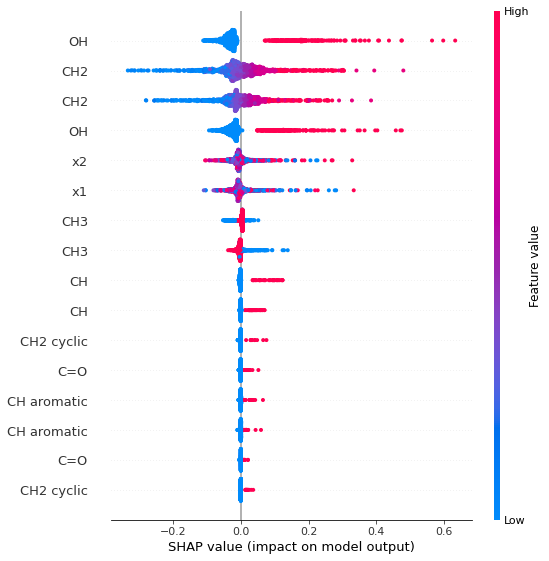

In [ ]:
shap.summary_plot(shap_values,feature_names=[ "CH3_1", "CH2", "CH", "C=O", "OH", "CH2 cyclic", "CH aromatic", "CH3", "CH2", "CH", "C=O", "OH", "CH2 cyclic", "CH aromatic", "x1", "x2"])